# 4 - Fun√ß√µes Wiggly

<img src="./images/cat_bow_tie.jpg" atl="cat with bow tie" width=1000>

[](https://www.youtube.com/watch?v=ENxTrFf9a7c)

----

No cap√≠tulo anterior vimos como construir o nosso primeiro modelo de regress√£o linear, no qual estimamos a altura de uma pessoa usando a informa√ß√£o de seu pr√≥prio peso como um aux√≠lio informativo. Temos, assim, como resultado do nosso modelo, a distribui√ß√£o √† posteriori dos par√¢metros que foram estimados, $\alpha$, $\beta$ e o $\sigma$.

```{admonition} Modelo Linear Simples

$$ altura_i = \alpha + \beta (peso_i - peso\_medio) $$

```

Das distribui√ß√µes √† posteriori dos par√¢metros podemos pegar apenas os valores `"precisos"` desses par√¢metros, ou seja, geralmente n√≥s tendemos `pensar apenas com os valores esperados` (*`valores m√©dios`*) da distribui√ß√£o do $\alpha$ e do $\beta$ e, com isso, tra√ßar uma linha reta com esses valores.

Olhando para os resultados das infer√™ncias dos par√¢metros, quando o **peso** est√° em seu valor m√©dio, temos que $\alpha$ significa o valor m√©dio da altura! 

Percebeu? Percebeu como isso √© muito bonito! Agora temos uma interpreta√ß√£o decente para o $\alpha$!

Agora, o que significa o nosso $\beta$? Temos que para cada unidade de $peso$ que aumentarmos a altura $h$ tamb√©m aumentar√° em $\beta$ unidades. Assim, para nosso exemplo, `cada kilo que aumentarmos, a altura tamb√©m tende a aumentar`, em m√©dia, $0.90$cm.



Mas sabemos que isso √© insuficiente, porque queremos obter a incerteza a partir desse gr√°fico. A estat√≠stica bayesiana n√£o lhe dar√° uma √∫nica estimativa pontual, mas sim, `dar√° a SUA incerteza, que √© comunicada a n√≥s pela distribui√ß√£o √† posteriori`. Essa incerteza √© representada pelo *n√∫mero infinito de linhas*, e cada uma dessas linhas s√£o classificadas pela sua `plausibilidade relativa` (*sua probabilidade*) em compara√ß√£o todas as outras linhas!

```{warning}
OBS: A partir de agora irei definir as vari√°veis em Ingl√™s, mas os coment√°rios continuar√£o em portugu√™s para facilitar o entendimento seguir com o prop√≥sito do material. 

Em ambientes profissionais √© recomendado escrever tudo em ingl√™s.
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stan
import nest_asyncio

In [2]:
import logging
logging.getLogger("pystan").propagate=False

In [3]:
# Desbloqueio do asyncIO do jupyter
nest_asyncio.apply()

In [4]:
# Definindo o plano de fundo cinza claro para todos os gr√°ficos feitos no matplotlib
plt.rcParams['axes.facecolor'] = 'lightgray'

In [5]:
# Lendo os dados

# Os dados podem serem obtidos em https://github.com/rmcelreath/rethinking/tree/master/data/Howell1.csv
df = pd.read_csv('./data/Howell1.csv', sep=';')  

weight = df.loc[df.age >= 30, 'weight'].values  # Filtro para pessoas com 30 anos ou mais 
height = df.loc[df.age >= 30, 'height'].values  # Filtro para pessoas com 30 anos ou mais

In [6]:
model_stan = """
    data {
        int N;
        vector[N] height;
        vector[N] weight;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;  // Priori impl√≠cita Uniforme(0, 50)
    }
    
    model {
        alpha ~ normal(178, 20);  // Priori para Alpha
        beta ~ lognormal(0, 1);  // Priori para Beta
        
        height ~ normal(alpha + beta * weight, sigma);
    }
"""

In [7]:
# =============================================================
#    Estimativa da altura explicada com a vari√°vel peso.
# =============================================================
# Reescrevendo o modelo anterior 

# Lembrando que estamos usando o (x_i - x_barra) e n√£o apenas x_i
weight_adjust = weight - weight.mean() 

my_data = {
    'N': len(weight),
    'height': height,
    'weight': weight_adjust,
}

posteriori = stan.build(model_stan, data=my_data)
fit = posteriori.sample(num_chains=4, num_samples=1000)

# Recuperando os par√¢metros
alpha = fit['alpha'].flatten()
beta = fit['beta'].flatten()
sigma = fit['sigma'].flatten()


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 16, column 8: Parameter beta is given a lognormal distribution, which has strictly positive support, but beta was not constrained to be strictly positive.
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 15, column 28: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 15, column 23: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: lognormal_

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0138021, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.324715, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like 

  Exception: lognormal_lpdf: Random variable is -0.00768006, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0214458, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is abou

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -2.00494, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -1.14206, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like cov

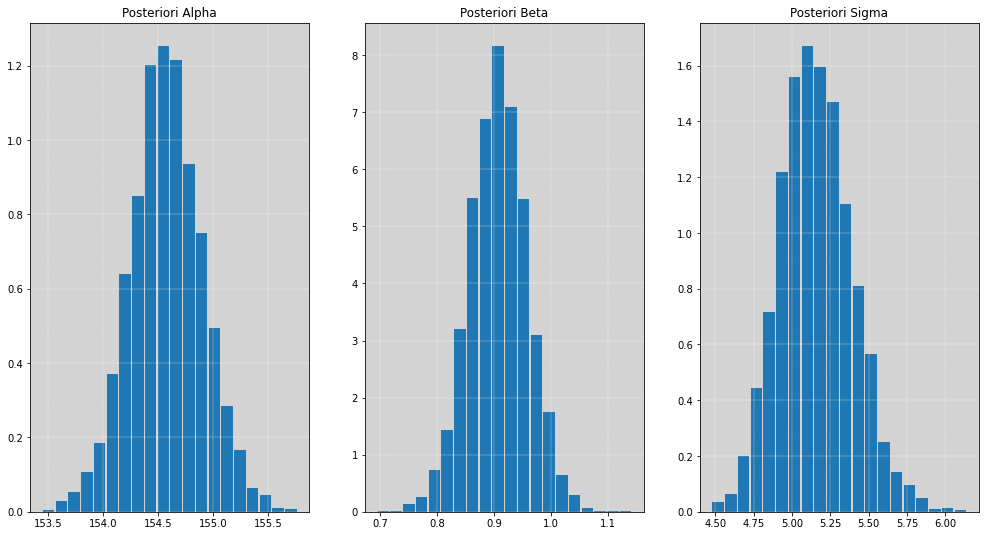

In [8]:
# ==========================================
#  Plotando os histogramas dos Par√¢mentros
# ==========================================

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 9))

# Par√¢metro: alpha
ax1.hist(alpha, density=True, rwidth=0.9, bins=20)
ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_title('Posteriori Alpha')

# Par√¢metro: beta
ax2.hist(beta, density=True, rwidth=0.9, bins=20)
ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_title('Posteriori Beta')

# Par√¢metro: sigma
ax3.hist(sigma, density=True, rwidth=0.9, bins=20)
ax3.grid(ls='--', color='white', linewidth=0.4)
ax3.set_title('Posteriori Sigma')

plt.show()

## A observa√ß√£o da nossa Incerteza

Agora n√≥s iremos fazer a amostragem das *posterioris*. Uma das raz√µes para usarmos esse procedimento de amostragem √© que isso torna mais f√°cil de se pensar e, tamb√©m, esse procedimento pode ser aplicado a **todos** os tipos de modelos poss√≠veis bayesianos que quisermos ajustar.

Nossa distribui√ß√£o √† posteriori cont√©m muitas linhas retas l√° dentro, representadas pela amostragem dos valores da distribui√ß√£o dos $\alpha$ e dos $\beta$ com o $\sigma$ informando o desvio padr√£o.

Abaixo vamos ver as primeiras linhas do conjunto de dados dessas estimativas e as suas medidas de resumo:

In [9]:
print(pd.DataFrame({'alpha': alpha[:10], 'beta': beta[:10], 'sigma': sigma[:10]}))

        alpha      beta     sigma
0  154.793182  0.923539  5.435616
1  154.468616  1.039282  5.043490
2  154.822647  0.927548  5.398800
3  154.341950  0.915308  4.958441
4  154.709291  0.918189  5.324938
5  154.047471  0.981752  5.115015
6  154.271946  0.914644  4.866339
7  154.679136  0.854590  5.069760
8  154.429305  0.964172  5.609981
9  154.890463  0.994046  5.310243


```{note}
Para cada linha do conjunto de dados acima √© uma linha reta no nosso modelo! 
```

e o resumo dos dados:

In [10]:
pd.DataFrame({'alpha': alpha[:10], 'beta': beta[:10], 'sigma': sigma[:10]}).describe()

alpha       beta      sigma
count   10.000000  10.000000  10.000000
mean   154.545401   0.943307   5.213262
std      0.275993   0.052117   0.237460
min    154.047471   0.854590   4.866339
25%    154.363789   0.916028   5.050058
50%    154.573876   0.925544   5.212629
75%    154.772209   0.977357   5.380335
max    154.890463   1.039282   5.609981

N√≥s temos muitas linhas! E as linhas `mais plaus√≠veis s√£o as linhas que tem maior n√∫mero de maneiras de reproduzir os dados que observamos`. Essa plausabilidade √© apresentada para n√≥s atrav√©s do maior ac√∫mulo de linhas retas que se sobrep√µem. 


Quanto mais as linhas se sobreporem entre si em uma certa regi√£o, `maior ser√° a plausabilidade dessas retas descreverem os dados que observamos`. 


```{note}
`O ac√∫mulo dessas retas representa a nossa incerteza.`
```

Foi primeira vez que conseguimos realmente observar, conscientemente, a nossa incerteza em um gr√°fico. *Lindo demais*!!!

Para termos uma melhor compreens√£o nesse momento, n√≥s vamos supor que ao inv√©s de nossa amostra ter 251 indiv√≠duos, vamos supor que temos apenas alguns subconjuntos. Nosso objetivo aqui √© mostrar que quanto mais informa√ß√µes temos (isto √©, quanto *maior a nossa amostra*), menor ser√° a nossa incerteza!

Para ficar mais claro, vamos simular a essa nossa estrat√©gia e ver as diferen√ßas dos **ac√∫mulos das linhas**.

In [11]:
def generate_parcial_stan_models_results(N):
    """
    Ajustando as estimativas de um modelo linear 
    usando os primeiros N indiv√≠duos da amostra.
    
    Parameters:
        N: Quantidade de indiv√≠duos que iremos 
           utilizar na estimativa dos par√¢metros.
    
    Return: 
       Estimativas do alpha, beta e o sigma, dado os dados. 
    """
    weight_adjust = weight - weight.mean() 

    my_data = {
        'N': N,
        'height': height[:N],
        'weight': weight_adjust[:N],
    }

    posteriori = stan.build(model_stan, data=my_data)
    fit = posteriori.sample(num_chains=4, num_samples=1000)

    # Recuperando os par√¢metros
    alpha = fit['alpha'].flatten()
    beta = fit['beta'].flatten()
    sigma = fit['sigma'].flatten()
    
    return alpha, beta, sigma

In [12]:
# =====================================================
#   Rodando o modelo anterior utilizando diferentes N
# =====================================================

N_10 = 10     
alpha_10, beta_10, sigma_10 = generate_parcial_stan_models_results(N_10);


N_50 = 50     
alpha_50, beta_50, sigma_50 = generate_parcial_stan_models_results(N_50);


N_100 = 100     
alpha_100, beta_100, sigma_100 = generate_parcial_stan_models_results(N_100);


N = len(weight) # Com toda amostra dispon√≠vel
alpha, beta, sigma = generate_parcial_stan_models_results(N);

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 16, column 8: Parameter beta is given a lognormal distribution, which has strictly positive support, but beta was not constrained to be strictly positive.
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 15, column 28: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 15, column 23: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: lognormal_

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.203231, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.139454, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like c

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -5.64024, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -5.33312, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtd

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0885079, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.292074, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be ei

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.762851, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0182163, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_p

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0200619, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -6.2488, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning 

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0197221, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.455354, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.172397, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_gkf88i04/model_pbtdjnye.stan', line 16, column 8: Parameter beta is given a lognormal distribution, which has strictly positive support, but beta was not 

  Exception: lognormal_lpdf: Random variable is -0.0592401, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.108578, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about 

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.369861, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.383444, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like c

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0965551, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.390903, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_p

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.805827, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.207758, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -2.30669, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0114739, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pb

  Exception: lognormal_lpdf: Random variable is -1.4, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: lognormal_lpdf: Random variable is -0.585044, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.469249, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.45276, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -1.80373, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtd

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.0424711, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.704104, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be ei

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -9.2989, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.265082, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtd

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -2.25411, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -686.518, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be eithe

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.11462, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbtdjnye.stan', line 16, column 8 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -0.266119, but must be nonnegative! (in '/tmp/httpstan_vix_tdsq/model_pbt

```{note}
Uma das vantagens do gr√°fico gr√°fico de linhas (gr√°fico de espaguetes) √© deixar claro que os limites formados pelas retas n√£o tem significado algum.
```

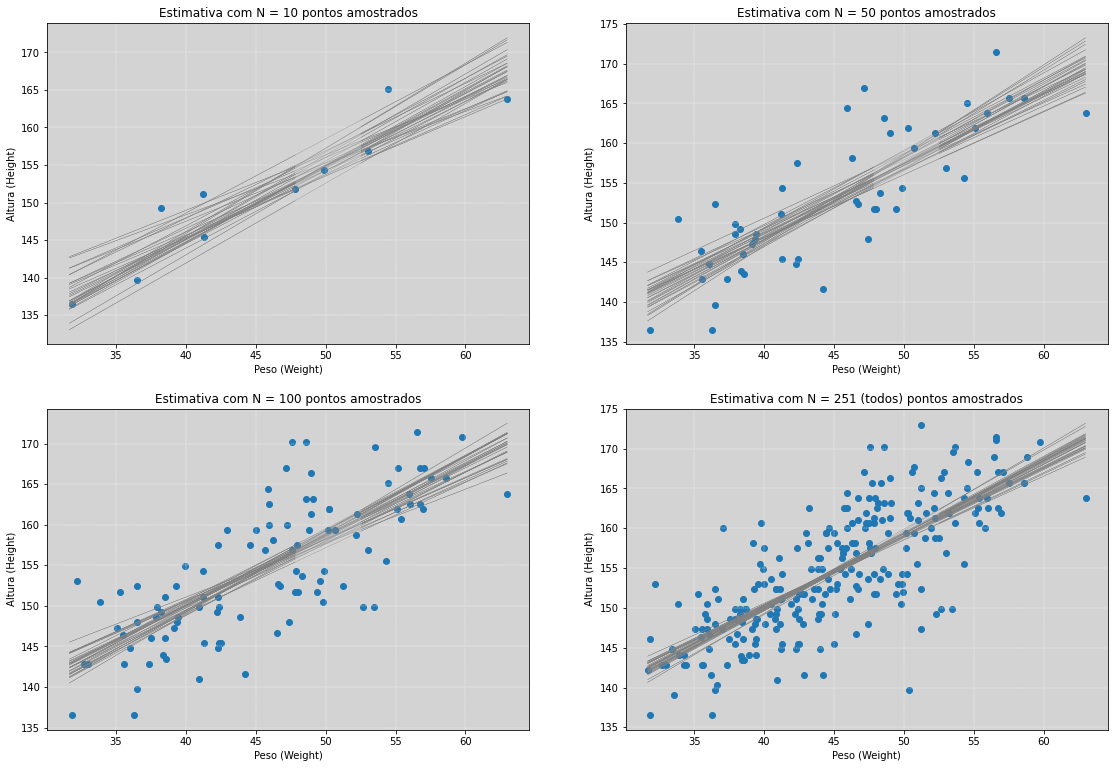

In [13]:
# =============================
#     Gr√°fico de Espaguete
# =============================
# Vamos usar a vari√°vel weight_adjust igual para todos os 
# pesos sem perda de generalidade para essa an√°lise.

# Plot dos dados altura x peso
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(19, 13))

# N√∫mero de linhas retas que iremos plotar
qty_lines = 30

# ===============================================
#    Estimando as curvas usando 10 amostras
# ===============================================

ax1.scatter(weight[:N_10], height[:N_10])

for i in range(qty_lines):
    ax1.plot(weight, alpha_10[i] + beta_10[i] * weight_adjust, color='gray', linewidth=0.3)

ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_title('Estimativa com N = ' + str(N_10) + ' pontos amostrados')
ax1.set_xlabel('Peso (Weight)')
ax1.set_ylabel('Altura (Height)')


# ===============================================
#    Estimando as curvas usando 50 amostras
# ===============================================

ax2.scatter(weight[:N_50], height[:N_50])

for i in range(qty_lines):
    ax2.plot(weight, alpha_50[i] + beta_50[i] * weight_adjust, color='gray', linewidth=0.3)

ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_title('Estimativa com N = ' + str(N_50) + ' pontos amostrados')
ax2.set_xlabel('Peso (Weight)')
ax2.set_ylabel('Altura (Height)')


# ===============================================
#    Estimando as curvas usando 100 amostras
# ===============================================

ax3.scatter(weight[:N_100], height[:N_100])

for i in range(qty_lines):
    ax3.plot(weight, alpha_100[i] + beta_100[i] * weight_adjust, color='gray', linewidth=0.3)

ax3.grid(ls='--', color='white', linewidth=0.4)
ax3.set_title('Estimativa com N = ' + str(N_100) + ' pontos amostrados')
ax3.set_xlabel('Peso (Weight)')
ax3.set_ylabel('Altura (Height)')


# =================================================
#    Estimando as curvas usando todas as amostras
# =================================================

ax4.scatter(weight, height)

for i in range(qty_lines):
    ax4.plot(weight, alpha[i] + beta[i] * weight_adjust, color='gray', linewidth=0.3)

ax4.grid(ls='--', color='white', linewidth=0.4)
ax4.set_title('Estimativa com N = ' + str(N) + ' (todos) pontos amostrados')
ax4.set_xlabel('Peso (Weight)')
ax4.set_ylabel('Altura (Height)')

plt.show()

A divis√£o dos gr√°ficos acima foi constru√≠da para conseguirmos percerber, de modo visual, `que quando mais amostras tivermos coletado` (isto √©, *quanto maior n√∫mero de pontos azuis n√≥s tivermos coletados como amostra*), mais informa√ß√µes teremos e, portanto, teremos muito `menos incerteza` sobre o nosso objeto de estudo. 

A nossa incerteza pode ser observada pela *dispers√£o* das curvas no gr√°fico, portanto `quanto maior for a dispers√£o maior ser√° a nossa incerteza` sobre o que est√° acontecendo.

## Construindo a Distribui√ß√£o Preditiva de $\mu_i$, dado um peso $x_i$

Modelo linear para a altura m√©dia $\mu_i$ √©: 


$$ \mu_i = \alpha + \beta(x_i - \bar{x}) $$

Agora, a ideia b√°sica √© que, dado um valor espec√≠fico do peso de um indiv√≠duo, $x_i$ (*weight*), podemos obter uma distribui√ß√£o preditiva do $\mu_i$. Essa distribui√ß√£o preditiva nos informa quais as regi√µes de maior confian√ßa que podemos esperar para a m√©dia da altura, de uma pessoa com o peso $x_i$.

Para exemplificar, vamos supor que queremos estimar a altura (*height*) de uma pessoa com $50 kg$, ent√£o:

$$ \mu_i = \alpha + \beta(50 - \bar{x}) $$

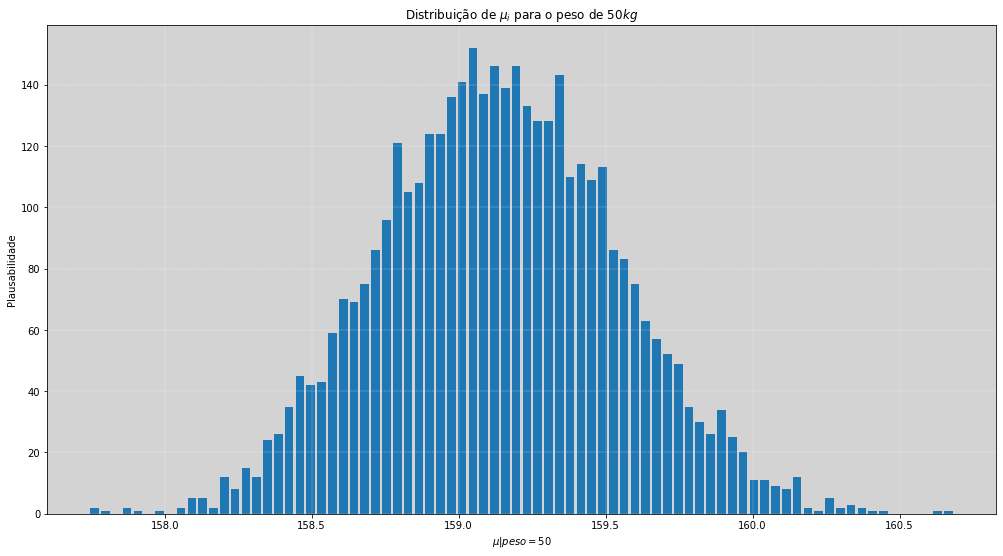

In [14]:
# ===========================================================
#    Construindo a distribui√ß√£o preditiva de ùúá | x=50
# ===========================================================

mu_50_kg = alpha + beta * (50 - weight.mean())

plt.figure(figsize=(17, 9))
plt.hist(mu_50_kg, density=False, bins=80, rwidth=0.8)
plt.grid(ls='--', color='white', linewidth=0.3)

plt.title('Distribui√ß√£o de $\mu_i$ para o peso de $50 kg$')
plt.ylabel('Plausabilidade')
plt.xlabel('$\mu | peso=50$')

plt.show()

## Calculando a predi√ß√£o para todos os $\mu_i$

In [15]:
def HPDI(posterior_samples, credible_mass):
    
    # Calcula o maior intervalo de probabilidades a partir de uma amostra
    
    # Fonte: https://stackoverflow.com/questions/22284502/highest-posterior-density-region-and-central-credible-region
    # ** Refazer essa fun√ß√£o para entender **
    
    sorted_points = sorted(posterior_samples)
    ciIdxInc = np.ceil(credible_mass * len(sorted_points)).astype('int')
    nCIs = len(sorted_points) - ciIdxInc
    ciWidth = [0]*nCIs
    
    for i in range(0, nCIs):
        ciWidth[i] = sorted_points[i + ciIdxInc] - sorted_points[i]
        HDImin = sorted_points[ciWidth.index(min(ciWidth))]
        HDImax = sorted_points[ciWidth.index(min(ciWidth))+ciIdxInc]

    return(HDImin, HDImax)

In [16]:
# =====================================
#    Calculando o HPDI dos dados
# =====================================

posterioris_dict_10 = {}  # Dicion√°rio com todas as posterioris para cada um dos pesos (weight) variando de 25 √° 70.
posterioris_dict_50 = {}  # Dicion√°rio com todas as posterioris para cada um dos pesos (weight) variando de 25 √° 70.
posterioris_dict_100 = {}  # Dicion√°rio com todas as posterioris para cada um dos pesos (weight) variando de 25 √° 70.
posterioris_dict = {}  # Dicion√°rio com todas as posterioris para cada um dos pesos (weight) variando de 25 √° 70.

for weight_i in range(25, 71):
    posterioris_dict_10[weight_i] = alpha_10 + beta_10 * (weight_i - weight.mean())
    posterioris_dict_50[weight_i] = alpha_50 + beta_50 * (weight_i - weight.mean())
    posterioris_dict_100[weight_i] = alpha_100 + beta_100 * (weight_i - weight.mean())
    posterioris_dict[weight_i] = alpha + beta * (weight_i - weight.mean())
    
# Gerando os dataframes
posterioris_10 = pd.DataFrame(posterioris_dict_10)
posterioris_50 = pd.DataFrame(posterioris_dict_50)
posterioris_100 = pd.DataFrame(posterioris_dict_100)
posterioris = pd.DataFrame(posterioris_dict)

# Calculando as m√©dias das posterioris
posterioris_means_10 = posterioris_10.mean()
posterioris_means_50 = posterioris_50.mean()
posterioris_means_100 = posterioris_100.mean()
posterioris_means = posterioris.mean()

# Calculando os intervalos de HPDI das posterioris
posterioris_HPDIs_10 = []
posterioris_HPDIs_50 = []
posterioris_HPDIs_100 = []
posterioris_HPDIs = []

for weight_i in range(25, 71):
    posterioris_HPDIs_10.append(HPDI(posterioris_10[weight_i], 0.89))
    posterioris_HPDIs_50.append(HPDI(posterioris_50[weight_i], 0.89))
    posterioris_HPDIs_100.append(HPDI(posterioris_100[weight_i], 0.89))
    posterioris_HPDIs.append(HPDI(posterioris[weight_i], 0.89))
    
# Tranformando os dados em um array numpy    
posterioris_HPDIs_10 = np.array(posterioris_HPDIs_10)  
posterioris_HPDIs_50 = np.array(posterioris_HPDIs_50) 
posterioris_HPDIs_100 = np.array(posterioris_HPDIs_100)
posterioris_HPDIs = np.array(posterioris_HPDIs)

### A Compatibilidade da Gravata Borboleta

Conforme os quatro gr√°ficos plotados acima, iremos replot√°-los por√©m agora mostrando o `intervalo de compatibilidade` (*estilo gravata borboleta*). 


<img src="./images/bow_tie.jpg" alt="Bow Tie" width=1000>

Ao olhar para esse gr√°fico √© f√°cil cairmos na tenta√ß√£o de acharmos que os limites que escolhemos significa alguma coisa, `ele n√£o tem nenhum significado` a n√£o ser os limites de corte pelo HPDI que escolhemos. 

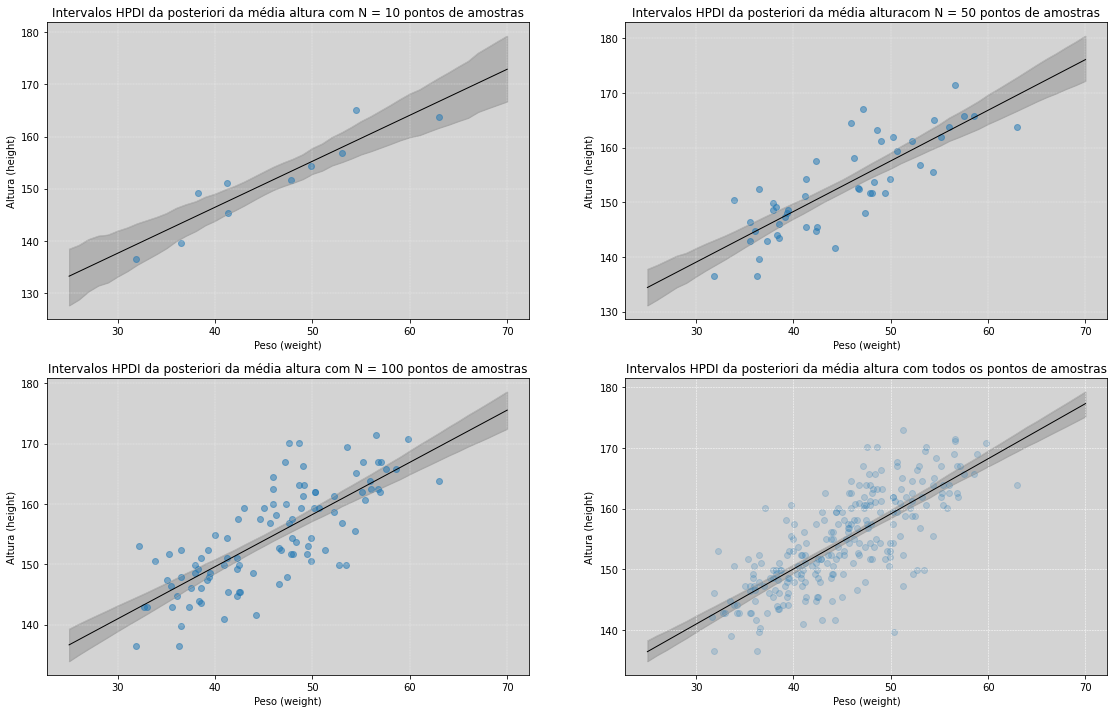

In [17]:
# ==================================================
#       Plotando os gr√°fico de gravata borboletas
# ==================================================

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(19,12))

# ===============================================
#    Estimando as curvas usando 10 amostras
# ===============================================
ax1.plot(range(25, 71), posterioris_HPDIs_10, color='darkgray', linewidth=0.5)
ax1.fill_between(range(25, 71), posterioris_HPDIs_10[:, 0], posterioris_HPDIs_10[:, 1], color='gray', alpha=0.4)
ax1.scatter(weight[:N_10], height[:N_10], alpha=0.5)

ax1.plot(range(25, 71), posterioris_means_10, color='black', linewidth=1)
ax1.grid(ls='--', color='white', linewidth=0.3)
ax1.set_title('Intervalos HPDI da posteriori da m√©dia altura com N = ' + str(N_10) + ' pontos de amostras')
ax1.set_ylabel('Altura (height)')
ax1.set_xlabel('Peso (weight)')

# ===============================================
#    Estimando as curvas usando 50 amostras
# ===============================================
ax2.plot(range(25, 71), posterioris_HPDIs_50, color='darkgray', linewidth=0.5)
ax2.fill_between(range(25, 71), posterioris_HPDIs_50[:, 0], posterioris_HPDIs_50[:, 1], color='gray', alpha=0.4)
ax2.scatter(weight[:N_50], height[:N_50], alpha=0.5)

ax2.plot(range(25, 71), posterioris_means_50, color='black', linewidth=1)
ax2.grid(ls='--', color='white', linewidth=0.3)
ax2.set_title('Intervalos HPDI da posteriori da m√©dia alturacom N = ' + str(N_50) + ' pontos de amostras')
ax2.set_ylabel('Altura (height)')
ax2.set_xlabel('Peso (weight)')

# ===============================================
#    Estimando as curvas usando 100 amostras
# ===============================================
ax3.plot(range(25, 71), posterioris_HPDIs_100, color='darkgray', linewidth=0.5)
ax3.fill_between(range(25, 71), posterioris_HPDIs_100[:, 0], posterioris_HPDIs_100[:, 1], color='gray', alpha=0.4)
ax3.scatter(weight[:N_100], height[:N_100], alpha=0.5)

ax3.plot(range(25, 71), posterioris_means_100, color='black', linewidth=1)
ax3.grid(ls='--', color='white', linewidth=0.3)
ax3.set_title('Intervalos HPDI da posteriori da m√©dia altura com N = ' + str(N_100) + ' pontos de amostras')
ax3.set_ylabel('Altura (height)')
ax3.set_xlabel('Peso (weight)')

# ==================================================
#    Estimando as curvas usando todas as amostras
# ==================================================
ax4.plot(range(25, 71), posterioris_HPDIs, color='darkgray', linewidth=0.5)
ax4.fill_between(range(25, 71), posterioris_HPDIs[:, 0], posterioris_HPDIs[:, 1], color='gray', alpha=0.4)
ax4.scatter(weight, height, alpha=0.2)

ax4.plot(range(25, 71), posterioris_means, color='black', linewidth=1)
ax4.grid(ls='--', color='white', linewidth=0.5)
ax4.set_title('Intervalos HPDI da posteriori da m√©dia altura com todos os pontos de amostras')
ax4.set_ylabel('Altura (height)')
ax4.set_xlabel('Peso (weight)')

plt.show()

Perceba que nos gr√°ficos de borboletas n√≥s usamos os cortes para os intervalos com $89\%$. Isso √© apenas para mostrar que n√£o, isso mesmo, `n√£o existe nada especial nos cortes do HPDI`. 

Por√©m existem alguns cortes que s√£o mais usados como o de $50%$, $90%$ ou $95%$, corriqueiramente s√£o usados em outras escolas estat√≠sticas, s√£o apenas cortes que queremos visualizar. **Nada mais!** 

At√© agora n√≥s fizemos os gr√°ficos apenas usando os par√¢metros da m√©dia ($\mu_i$), mas podemos construir o gr√°fico de envelope para o sigma ($\sigma$). 

Iremos construir ambos utilizando toda a nossa amostra. 

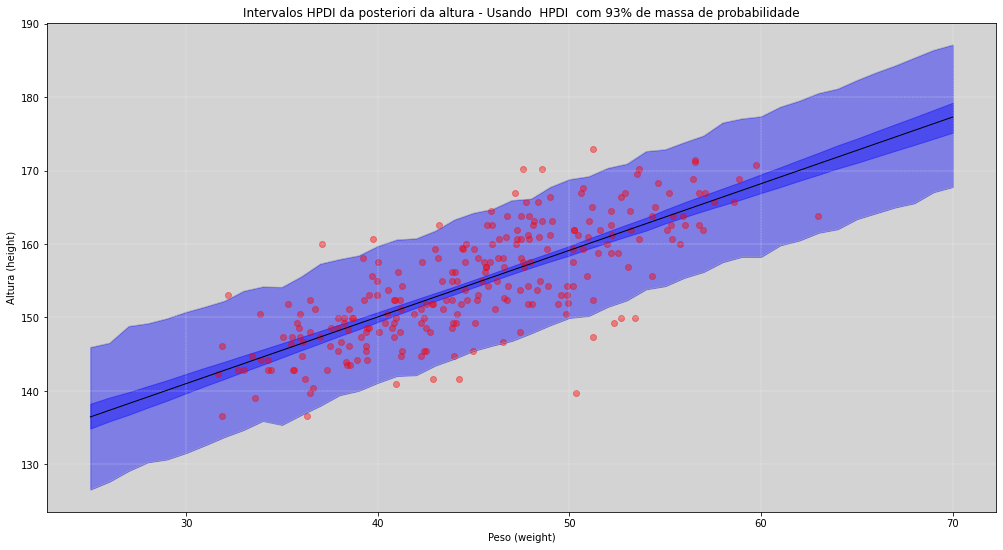

In [18]:
# ============================================================================
#     Plotando o HPDI da distribui√ß√£o preditiva da alutra e de sua m√©dia
# ============================================================================

# ===========================================
# Nota: Altere o valor para ver a diferen√ßa.
# ===========================================
HPDI_range = 0.93  # Define o tamanho do intervalo do HPDI. 

posterioris_height_HPDIs = []

for weight_i in range(25, 71):
    posteiori_height = np.random.normal(alpha + beta*(weight_i - weight.mean()), sigma)
    posterioris_height_HPDIs.append(HPDI(posteiori_height, HPDI_range))
    
posterioris_height_HPDIs = np.array(posterioris_height_HPDIs)

# Plontando o gr√°fico
plt.figure(figsize=(17, 9))

plt.plot(range(25, 71), posterioris_height_HPDIs, color='darkgray', linewidth=0.5)
plt.fill_between(range(25, 71), posterioris_height_HPDIs[:, 0], posterioris_height_HPDIs[:, 1], color='blue', alpha=0.4)
plt.fill_between(range(25, 71), posterioris_HPDIs[:, 0], posterioris_HPDIs[:, 1], color='blue', alpha=0.4)
plt.scatter(weight, height, color='red', alpha=0.4)

plt.plot(range(25, 71), posterioris_means, color='black', linewidth=1)
plt.grid(ls='--', color='white', linewidth=0.3)
plt.title('Intervalos HPDI da posteriori da altura - Usando  HPDI  com ' + str(int(HPDI_range*100)) + '% de massa de probabilidade')
plt.ylabel('Altura (height)')
plt.xlabel('Peso (weight)')

plt.show()

Como podemos ver no gr√°fico acima, temos duas regi√µes de confian√ßa. A regi√£o mais interna - *azul mais escura* - nos indica que esse trecho cont√©m $89\%$ de probabilidade da `m√©dia estar ali dentro`, para cada um dos pesos.

J√° a regi√£o mais externa - *aquela faixa azul mais clara* - nos indica que, com $93\%$ probabilidade, ser√° a regi√£o mais prov√°vel da altura de um pessoa, dado um determinado peso. 

Como teste para uma melhor compreens√£o, fa√ßa altera√ß√µes na vari√°vel `HPDI_range` para valores bem altos, por exemplo, $0.99$ e veja o quanto a faixa mais externa cobrir√° os dados (*os pontos vermelhos*). Para valores menores, isso tamb√©m ocorre, por exemplo, $0.7$.

Verifique!

```{warning}
A utiliza√ß√£o de valores baixos, ir√° demandar c√°lculos mais complexos e por isso pode ser muito demorado.
```

## Curvas a partir das Linhas Retas

O interessante de modelos lineares √© que eles `n√£o s√£o apenas lineares`, podem ser curvas tamb√©m. Isso √© uma coisa meio enlouquecedora sobre o termo que √© convencionalmente usado para desenhar linhas retas em gr√°ficos.

Mas uma regress√£o linear √© `aditiva`, vamos ter que essa equa√ß√£o para m√©dia ser√° a `soma de alguns par√¢metros vezes algumas vari√°veis observadas`. Assim teremos a soma de um monte de termos. 

Temos uma equa√ß√£o aditiva e coisas aditivas s√£o lineares na matem√°tica.

Mas para n√≥s, as palavras "adtiva" e "linear" s√£o diferentes, ent√£o chamaremos esses modelos de `Regress√µes Aditivas`. Porque, podemos usar coisas que n√£o parecem linhas retas. E, de agora at√© o final do cap√≠tulo, iremos fazer isso,  `desenhar curvas a partir de linhas retas`.

Mas antes de continuar, gostaria de explicar o por que √© interessante aprendermos a fazer esse tipo de modelagem?

Simples! Por que a `Natureza n√£o se limita a se manifestar por rela√ß√µes lineares entre  duas vari√°veis!` Os nossos intervalos podem ser aproxima√ß√µes √∫teis, mas geralmente s√£o bobos.

No nosso caso, n√≥s usamos as vari√°veis $altura$ e $peso$, por√©m apenas para indiv√≠duos que tivessem $30$ anos ou mais. Se foss√™mos usar todos os indiv√≠duos a rela√ß√£o do $peso$ e a $altura$ n√£o mais seria uma linha reta, mas sim uma curva!

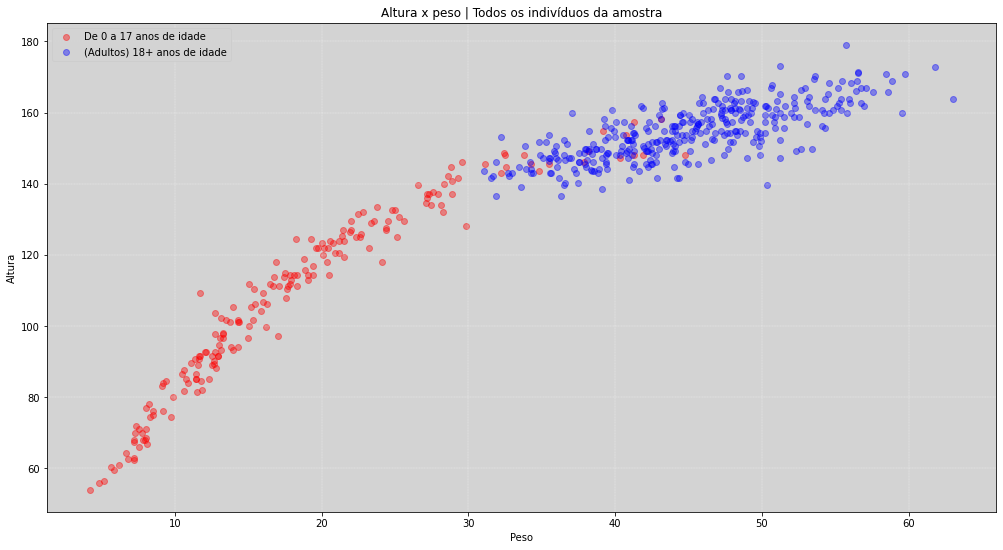

In [19]:
plt.figure(figsize=(17, 9))

# Indiv√≠duos com menos de 18 anos de idade
height_0_18 = df.loc[df.age < 18, 'height'].values
weight_0_18 = df.loc[df.age < 18, 'weight'].values

# Indiv√≠duos maiores (ou iguais) de 18 anos de idade - Adultos
height_18_ = df.loc[df.age >= 18, 'height'].values
weight_18_ = df.loc[df.age >= 18, 'weight'].values

# Plotando os gr√°ficos
plt.scatter(weight_0_18, height_0_18, label='De 0 a 17 anos de idade', color='red', alpha=0.4)
plt.scatter(weight_18_, height_18_, label='(Adultos) 18+ anos de idade', color='blue', alpha=0.4)

plt.grid(ls='--', color='white', linewidth=0.3)
plt.legend()
plt.title('Altura x peso | Todos os indiv√≠duos da amostra')
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()

Vamos ver dois modos de construir os modelos de `Regress√£o Aditivas`:

- **Regress√£o Polinomial**
    
    - Usada de forma comum
    
    - Geralmente apresenta um comportamento bem ruim
  

Esse √© um tipo bem comum de regress√£o, mas tamb√©m √© um modelo bem ruim. N√£o h√° nada de errado usar esse tipo de regress√£o supondo que voc√™ entenda o que *golem* est√° fazendo e assim usar de forma respons√°vel. Geralmente se utilizam esse tipo de modelo sem uma devida aten√ß√£o. Iremos ver o motivo dele serem mal comportados em breve.



- **Splines**

    - S√£o muito flex√≠veis 
    
    - Altamente Geoc√™ntrica
    

Existem muitos tipos de splines, mas n√≥s iremos ver apenas as `splines de base`, que s√£o provavelmente as mais comuns. Software de desenhos como `GIMP`, `Blender` e etc. que possuem essa ferramenta com o nome de *curvas de Bezier*, que nada mais s√£o do que splines de base.


As Splines s√£o muito flex√≠veis, muito mais flex√≠veis do que as Regress√µes Polinomiais, por√©m n√£o apresentam a patologia que os polin√¥mios apresentam e, por isso, s√£o considerados, na maioria dos casos, melhores que as regress√µes polin√¥miais.

Por√©m, tanto as splines quantos as regress√µes polinomiais s√£o `estrat√©gias geoc√™ntricas`, n√£o h√° nada de cient√≠fico nelas. S√£o apenas aproxima√ß√µes como o * modelo de epiciclos de Ptolomeu*.

Extrapola√ß√µes com esses modelos podem trazer `desastres nas predi√ß√µes`, por isso √© necess√°rio checar e entender o que est√° acontecendo com o modelo.

# Regress√£o Polinomial

Estrat√©gia puramente descritiva (*geoc√™ntrica*) usando uma vari√°vel como preditora polinomial.

- 1a Ordem (Linha): $ \mu_i = \alpha + \beta_1x_i $


- 2a Ordem (Par√°bola):  $\mu_i = \alpha + \beta_1x_i + \beta_2x^2_i$

### Modelo Parab√≥lico da Altura

O modelo parab√≥lico pode ser definido da seguinte forma:

$$ h_i \sim Normal(\mu_i, \sigma) $$


$$ \mu_i =  \alpha + \beta_1x_i + \beta_2x^2_i $$


$$ \alpha \sim Normal(178, 20) $$

$$ \beta_1 \sim  LogNormal(0, 1) $$

$$ \beta_2  \sim  Normal(0,  1) $$

$$ \sigma \sim Uniform(0,  50) $$

O problema desse modelo √© que os termo $\beta_1$ e $\beta_2$ n√£o tem um significado biol√≥gico, `isso √© apenas um ajuste na curvatura da fun√ß√£o`. Por esse motivo n√≥s temos que simular para entender oque est√° acontecendo com √† priori. Se n√£o entendermos o que s√£o essas vari√°veis, as nossas posterioris n√£o teram sentido interpretativo.

```{note}
N√£o √© para n√£o usar! Apenas use com responsabilidade.
```

### Padronizar os Preditores

- √â muito √∫til padronizar as vari√°veis preditoras antes de ajustar o modelo, temos algumas vantagens tais como:
    
    - Torna o processo de estima√ß√£o mais simples
    
    - Aux√≠lia na interpreta√ß√£o (*algumas vezes*)
    

Para padronizar as vari√°veis preditoras, siga os seguinte passos para todos os dados:

- subtrair cada valor da m√©dia da amostra.

- dividir o valor obtido acima pelo desvio padr√£o da amostra.

- Assim, essa opera√ß√£o resultar√° em: $M√©dia = 0$ ; $Desvio Padr√£o = 1$

In [20]:
# =================================================================
#       Construindo um Modelo de Regress√£o Parab√≥lica | Parcial
# =================================================================

weight_full = df.weight.values  # X_i
height_full = df.height.values  # Y_i

# Utilizando os 10 primeiros dados para pessoas acimas dos 18 anos - Teste de ajuste
height_full_18 = df.loc[df.age >= 18, 'height'].head(10).values
weight_full_18 = df.loc[df.age >= 18, 'weight'].head(10).values

# M√©dia e desvio padr√£o para todos os dados acima
weight_full_mean = np.mean(weight_full)
weight_full_std = np.std(weight_full)

weight_full_18_normalized = (weight_full_18 - weight_full_mean)/weight_full_std   # Padronizando as vari√°veis explicativa

model_stan_regression_parabolic = """
data {
    int N;
    vector[N] weight;
    vector[N] weight_2;
    vector[N] height;
}

parameters {
    real alpha;
    real<lower=0> beta_1;
    real beta_2;
    real<lower=0, upper=50> sigma;  // Priori Uniform (0, 50)
}

model {
    alpha ~ normal(178, 20);
    beta_1 ~ lognormal(0, 1);
    beta_2 ~ normal(0, 1);
    
    height ~ normal(alpha + beta_1*weight + beta_2*weight_2, sigma);
}
"""

# Construindo um dicion√°rio com os dados
my_data = {
    'N': len(weight_full_18_normalized),
    'weight': weight_full_18_normalized ,
    'weight_2': weight_full_18_normalized ** 2,  # x_i^2
    'height': height_full_18,
}

# Rodando o modelo na Stan
posteriori = stan.build(model_stan_regression_parabolic, data=my_data)
fit = posteriori.sample(num_chains=4, num_samples=1000)

# O sufixo '_rp', usado abaixo, √© refer√™nte ao modelo de Regress√£o Parab√≥lica.
alpha_rp = fit['alpha'].flatten()
beta_1_rp = fit['beta_1'].flatten()
beta_2_rp = fit['beta_2'].flatten()
sigma_rp = fit['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_ws8tspu6/model_6vwamrko.stan', line 17, column 24: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_ws8tspu6/model_6vwamrko.stan', line 17, column 19: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  G

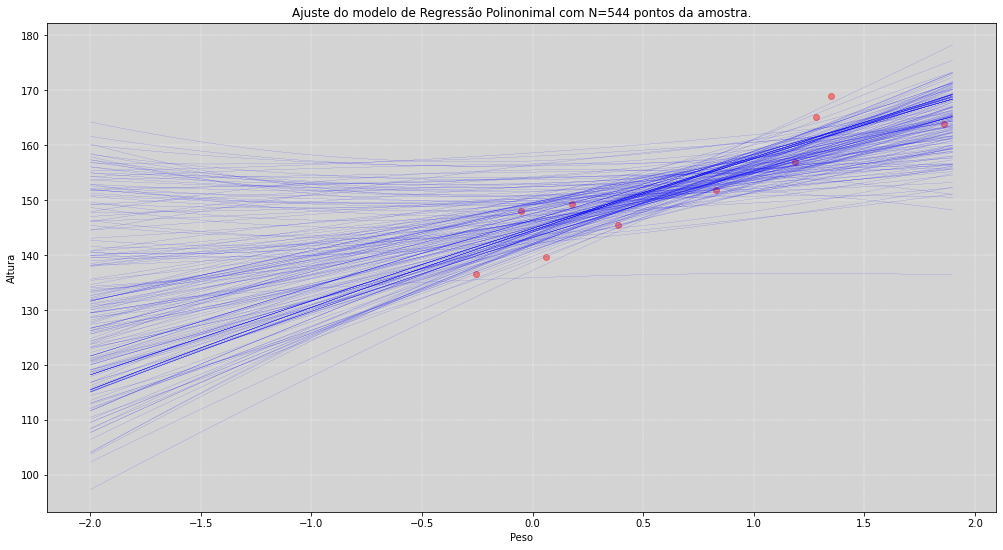

In [21]:
# ===================================================
#   Probabilidade √† Posteriori de mu com N=10
# ===================================================
plt.figure(figsize=(17,9))

for i in range(200):
    mu_poli = alpha_rp[i] + beta_1_rp[i] * np.arange(-2, 2, 0.1)  + beta_2_rp[i] * (np.arange(-2, 2, 0.1)**2 )   
    plt.plot(np.arange(-2, 2, 0.1), mu_poli, color='blue', linewidth=0.1)

# Pontos da amostra
plt.scatter(weight_full_18_normalized, height_full_18, color='red', alpha=0.4)
    
plt.title('Ajuste do modelo de Regress√£o Polinonimal com N='+str(len(weight_full))+' pontos da amostra.')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.grid(ls='--', color='white', linewidth=0.4)


plt.show()

`Regress√µes Polinomiais` tem esse tipo de anomalia impl√≠cita que vimos no gr√°fico acima. Dentro da regi√£o dos pontos ela se comporta de modo aceit√°vel, por√©m fora da regi√£o desses pontos, a fun√ß√£o se torna descontrolada. Isso ocorre porque exitem muitas outras fun√ß√µes de segundo grau que podem ser ajustadas nesse conjunto de pontos. Isso n√£o ocorre com tanta intensidade nas regress√µes com splines.

Perceba que para a `esquerda do zero` no eixo do peso (*peso est√° normalizado*) a fun√ß√£o come√ßa perder o controle e atinge valores que podem n√£o ser verdadeiros.

Uma segundo inconveniente que ocorre com as Regress√µes Polinomiais √© sua pr√≥pria estrutura matem√°tica. Apenas tr√™s par√¢metros, o $\alpha$, o $\beta_1$ e o $\beta_2$, controlam todo o comportamento da curva. Isso a torna um pouco mais r√≠gida para situa√ß√µes que precisamos de mais flexibilidade. As splines padr√µes t√™m, em sua constru√ß√£o, o pesamento de uma estrutura que evita esse tipo de inconveniente.

Lembre-se, ambos modelos, tanto os polinomiais quanto modelos com splines, s√£o modelos *geoc√™ntricos*. 

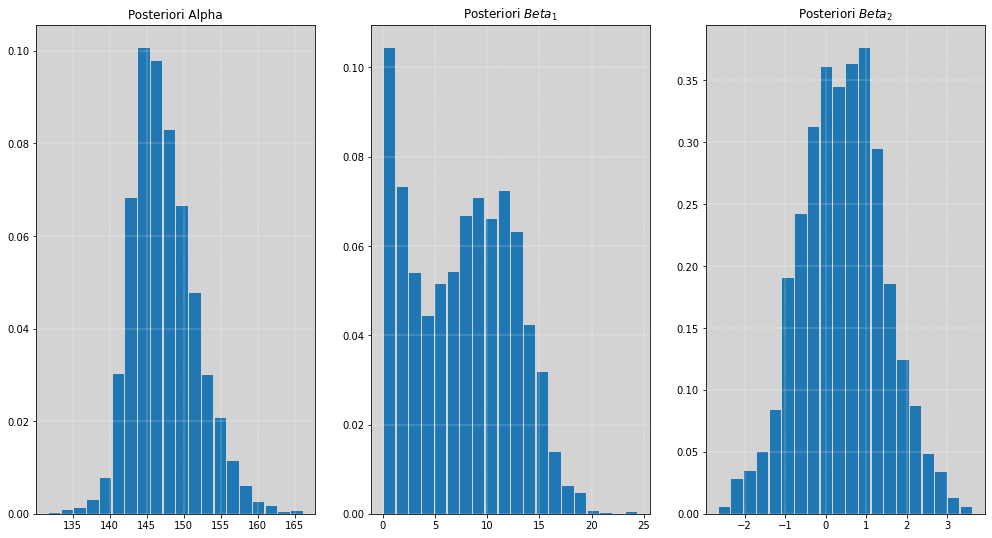

In [22]:
# =============================================================
#   Gr√°fico dos Histogramas das Posterioris dos Par√¢mentros
# =============================================================

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 9))

# Histograma da posteriori do alpha
ax1.hist(alpha_rp, density=True, rwidth=0.9, bins=20)
ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_title('Posteriori Alpha')

# Histograma da posteriori do beta_1
ax2.hist(beta_1_rp, density=True, rwidth=0.9, bins=20)
ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_title('Posteriori $Beta_1$')

# Histograma da posteriori do beta_2
ax3.hist(beta_2_rp, density=True, rwidth=0.9, bins=20)
ax3.grid(ls='--', color='white', linewidth=0.4)
ax3.set_title('Posteriori $Beta_2$')

plt.show()

In [23]:
# ==================================================================================
#       Construindo o Modelo de Regress√£o Parab√≥lica | Usando a Amostra Completa
# ==================================================================================

weight_full = df.weight.values  # X_i
height_full = df.height.values  # Y_i

weight_full_mean = np.mean(weight_full)
weight_full_std = np.std(weight_full)

weight_full_std = (weight_full - weight_full_mean)/weight_full_std   # Padronizando as vari√°veis explicativa

model_stan_regression_parabolic = """
    data {
        int N;
        vector[N] weight;
        vector[N] weight_2;
        vector[N] height;
    }

    parameters {
        real alpha;
        real<lower=0> beta_1;
        real beta_2;
        real<lower=0, upper=50> sigma;  // Priori Uniform (0, 50)
    }

    model {
        alpha ~ normal(178, 20);
        beta_1 ~ lognormal(0, 1);
        beta_2 ~ normal(0, 1);

        height ~ normal(alpha + beta_1*weight + beta_2*weight_2, sigma);
}
"""

my_data = {
    'N': len(weight_full_std),
    'weight': weight_full_std ,
    'weight_2': weight_full_std ** 2,
    'height': height_full,
}

posteriori = stan.build(model_stan_regression_parabolic, data=my_data)
fit = posteriori.sample(num_chains=4, num_samples=1000)

# rp := refer√™nte ao modelo de Regress√£o Parab√≥lica
alpha_rp = fit['alpha'].flatten()
beta_1_rp = fit['beta_1'].flatten()
beta_2_rp = fit['beta_2'].flatten()
sigma_rp = fit['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_u0prnceo/model_spl2vxne.stan', line 17, column 28: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_u0prnceo/model_spl2vxne.stan', line 17, column 23: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  11% (900/8000)
Sampling:  36% (2900/8000)
Sampling:  61% (4900/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust you

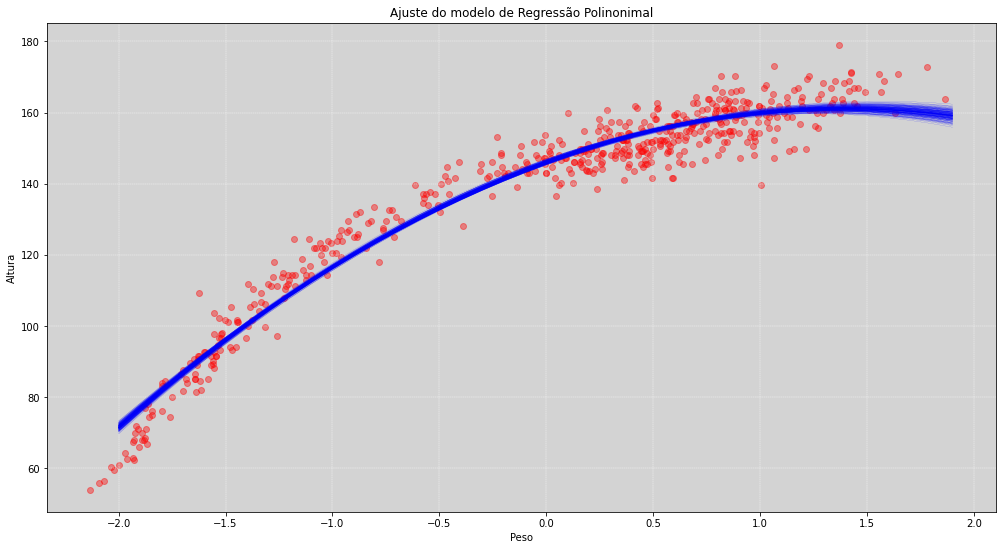

In [24]:
# ===================================================
#   Probabilidade √† Posteriori de mu
# ===================================================
plt.figure(figsize=(17,9))

for i in range(200):
    mu_poli = alpha_rp[i] + beta_1_rp[i] * np.arange(-2, 2, 0.1)  + beta_2_rp[i] * (np.arange(-2, 2, 0.1)**2 )   
    plt.plot(np.arange(-2, 2, 0.1), mu_poli, color='blue', linewidth=0.1)

# Pontos da amostra
plt.scatter(weight_full_std, height_full, color='red', alpha=0.4)
    
plt.title('Ajuste do modelo de Regress√£o Polinonimal')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.grid(ls='--', color='white', linewidth=0.4)


plt.show()

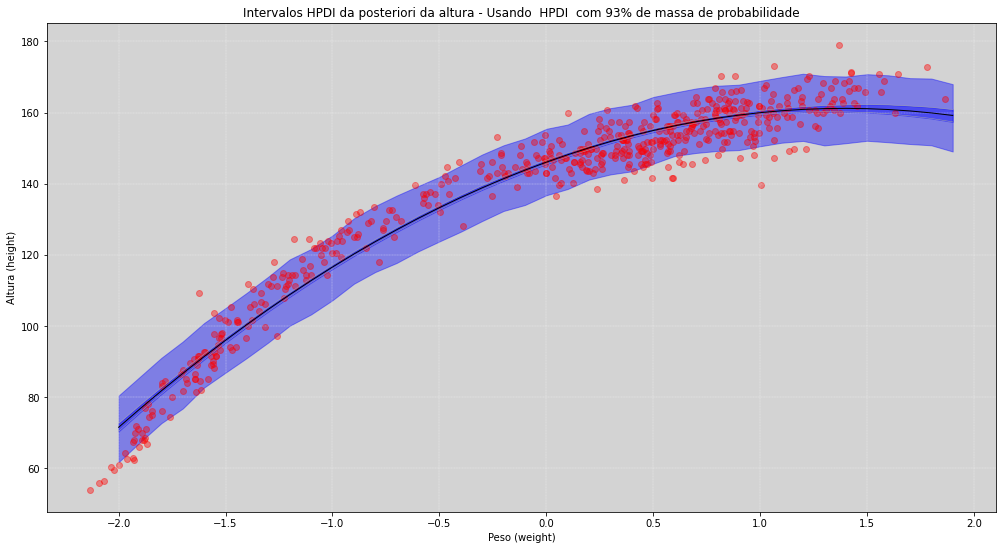

In [25]:
# ============================================
#      Probabilidade √† Posteriori - HPDI
# ============================================
posteriori_polinomial2_HPDI = []
posteriori_polinomial2_mean = []
posteriori_polinomial2_sigma = []

for weight_i in np.arange(-2, 2, 0.1):
    mu_poli = alpha_rp + beta_1_rp * weight_i + beta_2_rp * weight_i**2  
    posteriori_polinomial2_mean.append(np.mean(mu_poli))  # m√©dia
    posteriori_polinomial2_HPDI.append(HPDI(mu_poli, 0.87))  # HPDI
    posteriori_polinomial2_sigma.append(HPDI(np.random.normal(mu_poli, sigma_rp), 0.89))
    
posteriori_polinomial2_HPDI = np.array(posteriori_polinomial2_HPDI)
posteriori_polinomial2_sigma = np.array(posteriori_polinomial2_sigma)

# Plontando o gr√°fico
plt.figure(figsize=(17, 9))

plt.plot(np.arange(-2, 2, 0.1), posteriori_polinomial2_HPDI, color='darkgray', linewidth=0.5)
plt.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial2_HPDI[:, 0], posteriori_polinomial2_HPDI[:, 1], color='blue', alpha=0.4)
plt.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial2_sigma[:, 0], posteriori_polinomial2_sigma[:, 1], color='blue', alpha=0.4)
plt.scatter(weight_full_std, height_full, color='red', alpha=0.4)

plt.plot(np.arange(-2, 2, 0.1), posteriori_polinomial2_mean, color='black', linewidth=1)
plt.grid(ls='--', color='white', linewidth=0.3)
plt.title('Intervalos HPDI da posteriori da altura - Usando  HPDI  com ' + str(int(HPDI_range*100)) + '% de massa de probabilidade')
plt.ylabel('Altura (height)')
plt.xlabel('Peso (weight)')

plt.show()

# Modelos C√∫bicos

Seguindo o mesmo racioc√≠nio acima, vamos implementar o modelo de Regress√£o Polin√¥mial de grau 3. Abaixo temos a evolu√ß√£o dos modelos apresentados:

- 1a Ordem (Linha): $ \mu_i = \alpha + \beta_1x_i $


- 2a Ordem (Par√°bola):  $\mu_i = \alpha + \beta_1x_i + \beta_2x^2_i$


- 3a Ordem (Fun√ß√£o C√∫bica):  $\mu_i = \alpha + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i$

## Modelo Regress√£o C√∫bico para a Altura

O modelo para estimar a altura usando a fun√ß√£o polin√¥mial c√∫bica pode ser definida da seguinte forma:

$$ h_i \sim Normal(\mu_i, \sigma) $$


$$ \mu_i =  \alpha + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i$$


$$ \alpha \sim Normal(178, 20) $$

$$ \beta_1 \sim  LogNormal(0, 1) $$

$$ \beta_2  \sim  Normal(0,  1) $$

$$ \beta_3  \sim  Normal(0,  1) $$

$$ \sigma \sim Uniform(0,  50) $$

In [26]:
# ==============================================================================================
#       Construindo o Modelo de Regress√£o Parab√≥lica de 3 Grau | Usando a Amostra Completa
# ==============================================================================================

weight_full = df.weight.values  # X_i
height_full = df.height.values  # Y_i

weight_full_mean = np.mean(weight_full)
weight_full_std = np.std(weight_full)

weight_full_std = (weight_full - weight_full_mean)/weight_full_std   # Padronizando as vari√°veis explicativa

model_stan_regression_parabolic_3 = """
data {
    int N;
    vector[N] weight;
    vector[N] weight_2;
    vector[N] weight_3;
    vector[N] height;
}

parameters {
    real alpha;
    real beta_1;
    real beta_2;
    real beta_3;
    real<lower=0, upper=50> sigma;  // Priori Uniform (0, 50)
}

model {
    alpha ~ normal(178, 20);
    beta_1 ~ lognormal(0, 1);
    beta_2 ~ normal(0, 1);
    beta_3 ~ normal(0, 1);
    
    height ~ normal(alpha + beta_1*weight + beta_2*weight_2 + beta_3*weight_3, sigma);
}
"""

my_data = {
    'N': len(weight_full_std),
    'weight': weight_full_std ,
    'weight_2': weight_full_std ** 2,
    'weight_3': weight_full_std ** 3,
    'height': height_full,
}

posteriori_p3 = stan.build(model_stan_regression_parabolic_3, data=my_data)

fit_p3 = posteriori_p3.sample(num_chains=4, num_samples=1000)

# rp := refer√™nte ao modelo de Regress√£o Parab√≥lica
alpha_rp3 = fit_p3['alpha'].flatten()
beta_1_rp3 = fit_p3['beta_1'].flatten()
beta_2_rp3 = fit_p3['beta_2'].flatten()
beta_3_rp3 = fit_p3['beta_3'].flatten()
sigma_rp3 = fit_p3['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_4mf0sa6j/model_4zl6w5e2.stan', line 20, column 4: Parameter beta_1 is given a lognormal distribution, which has strictly positive support, but beta_1 was not constrained to be strictly positive.
Warning in '/tmp/httpstan_4mf0sa6j/model_4zl6w5e2.stan', line 19, column 24: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_4mf0sa6j/model_4zl6w5e2.stan', line 19, column 19: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   4% (300/8000)
Sampling:  10% (800/8000)
Sampling:  16% (1300/8000)
Sampling:  41% (3300/8000)
Sampling:  62% (5000/8000)
Sampling:  81% (6500/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
   

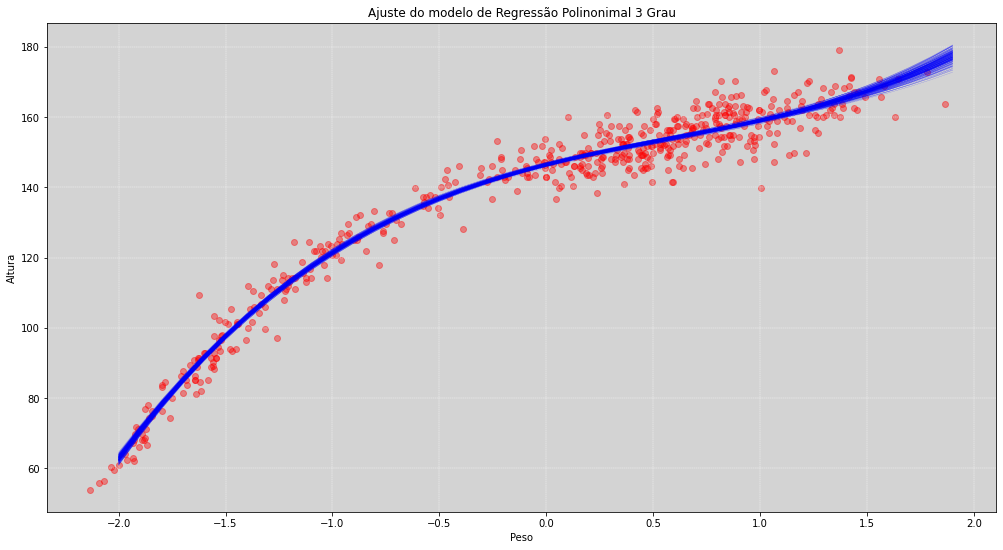

In [27]:
# ======================================
#   Probabilidade √† Posteriori de mu
# ======================================
plt.figure(figsize=(17,9))

for i in range(200):
    mu_poli3 = alpha_rp3[i] + \
              beta_1_rp3[i] * np.arange(-2, 2, 0.1) + \
              beta_2_rp3[i] * (np.arange(-2, 2, 0.1)**2) + \
              beta_3_rp3[i] * (np.arange(-2, 2, 0.1)**3)
                
    plt.plot(np.arange(-2, 2, 0.1), mu_poli3, color='blue', linewidth=0.1)

# Pontos da amostra
plt.scatter(weight_full_std, height_full, color='red', alpha=0.4)
    
plt.title('Ajuste do modelo de Regress√£o Polinonimal 3 Grau')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.grid(ls='--', color='white', linewidth=0.4)


plt.show()

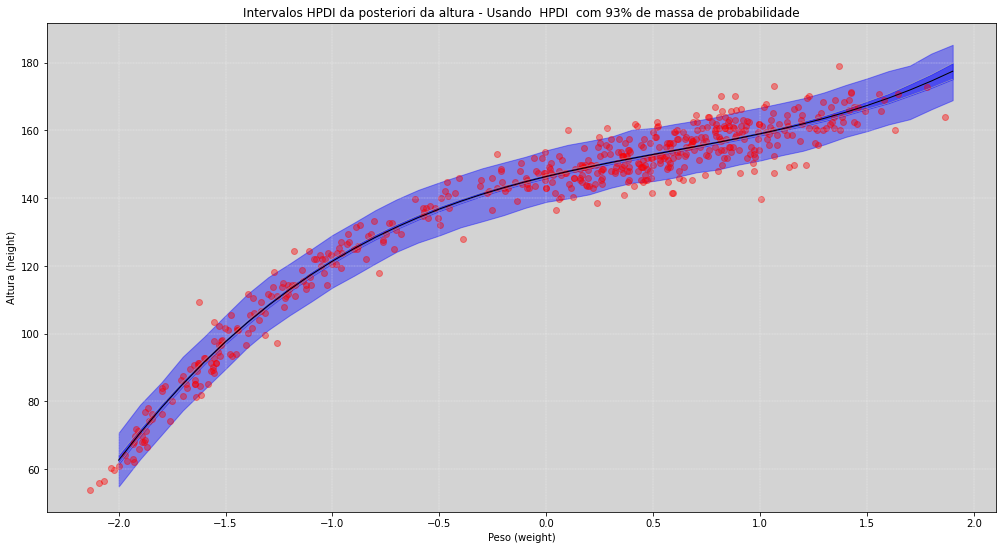

In [28]:
# ============================================
#      Probabilidade √† Posteriori - HPDI 
# ============================================
posteriori_polinomial3_mean = []
posteriori_polinomial3_HPDI = []
posteriori_polinomial3_sigma = []

for weight_i in np.arange(-2, 2, 0.1):
    mu_poli3 = alpha_rp3 + beta_1_rp3 * weight_i + beta_2_rp3 * weight_i**2 + beta_3_rp3 * weight_i**3 
    posteriori_polinomial3_mean.append(np.mean(mu_poli3))  # m√©dia
    posteriori_polinomial3_HPDI.append(HPDI(mu_poli3, 0.87))  # HPDI
    posteriori_polinomial3_sigma.append(HPDI(np.random.normal(mu_poli3, sigma_rp3), 0.89))
    
posteriori_polinomial3_HPDI = np.array(posteriori_polinomial3_HPDI)
posteriori_polinomial3_sigma = np.array(posteriori_polinomial3_sigma)

# Plontando o gr√°fico
plt.figure(figsize=(17, 9))

plt.plot(np.arange(-2, 2, 0.1), posteriori_polinomial3_HPDI, color='darkgray', linewidth=0.5)
plt.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial3_HPDI[:, 0], posteriori_polinomial3_HPDI[:, 1], color='blue', alpha=0.4)
plt.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial3_sigma[:, 0], posteriori_polinomial3_sigma[:, 1], color='blue', alpha=0.4)
plt.scatter(weight_full_std, height_full, color='red', alpha=0.4)

plt.plot(np.arange(-2, 2, 0.1), posteriori_polinomial3_mean, color='black', linewidth=1)
plt.grid(ls='--', color='white', linewidth=0.3)
plt.title('Intervalos HPDI da posteriori da altura - Usando  HPDI  com ' + str(int(HPDI_range*100)) + '% de massa de probabilidade')
plt.ylabel('Altura (height)')
plt.xlabel('Peso (weight)')

plt.show()

In [29]:
# =====================================================================================
#     Construindo o modelo de 1 grau (novamente) para a compara√ß√£o | Regress√£o Linear
# =====================================================================================

height_p1 = df.height.values
weight_p1 = df.weight.values

weight_p1_s = (weight_p1 - weight_p1.mean())/np.std(weight_p1)

model_stan_polinomio_1 = """
    data {
        int N;
        vector[N] weight;
        vector[N] height;
    }

    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;
    }

    model {
        alpha ~ normal(178, 20);
        beta ~ lognormal(0, 1);
        
        height ~ normal(alpha + beta*weight, sigma);
    }
"""
data = {
    'N': len(height_p1),
    'weight': weight_p1_s,
    'height': height_p1,
}

posteriori_p1 = stan.build(model_stan_polinomio_1, data=data)
fit_p1 = posteriori_p1.sample(num_chains=4, num_samples=1000)

alpha_p1 = fit_p1['alpha'].flatten()
beta_p1 = fit_p1['beta'].flatten()
sigma_p1 = fit_p1['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_sp3bdcaq/model_ofjtcp7q.stan', line 16, column 8: Parameter beta is given a lognormal distribution, which has strictly positive support, but beta was not constrained to be strictly positive.
Warning in '/tmp/httpstan_sp3bdcaq/model_ofjtcp7q.stan', line 15, column 28: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_sp3bdcaq/model_ofjtcp7q.stan', line 15, column 23: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: lognormal_

In [30]:
# =========================================================
#  Calculando os intervalos de HPDI para o modelo linear
# =========================================================

posterioris_height_HPDIs_p1_mean = []
mu_HPDI_p1 = []
posteriori_HPDI_p1 = []


for weight_i in np.arange(-2, 2, 0.1):
    posterioris_height_HPDIs_p1_mean.append(np.mean(alpha_p1 + beta_p1 * weight_i))
    mu_HPDI_p1.append(HPDI(alpha_p1 + beta_p1 * weight_i, 0.87))
    posteriori_HPDI_p1.append(HPDI(np.random.normal(alpha_p1 + beta_p1 * weight_i, sigma_p1), 0.85))
    
posterioris_height_HPDIs_p1 = np.array(mu_HPDI_p1)
mu_HPDI_p1 = np.array(mu_HPDI_p1)
posteriori_HPDI_p1 = np.array(posteriori_HPDI_p1)

[]

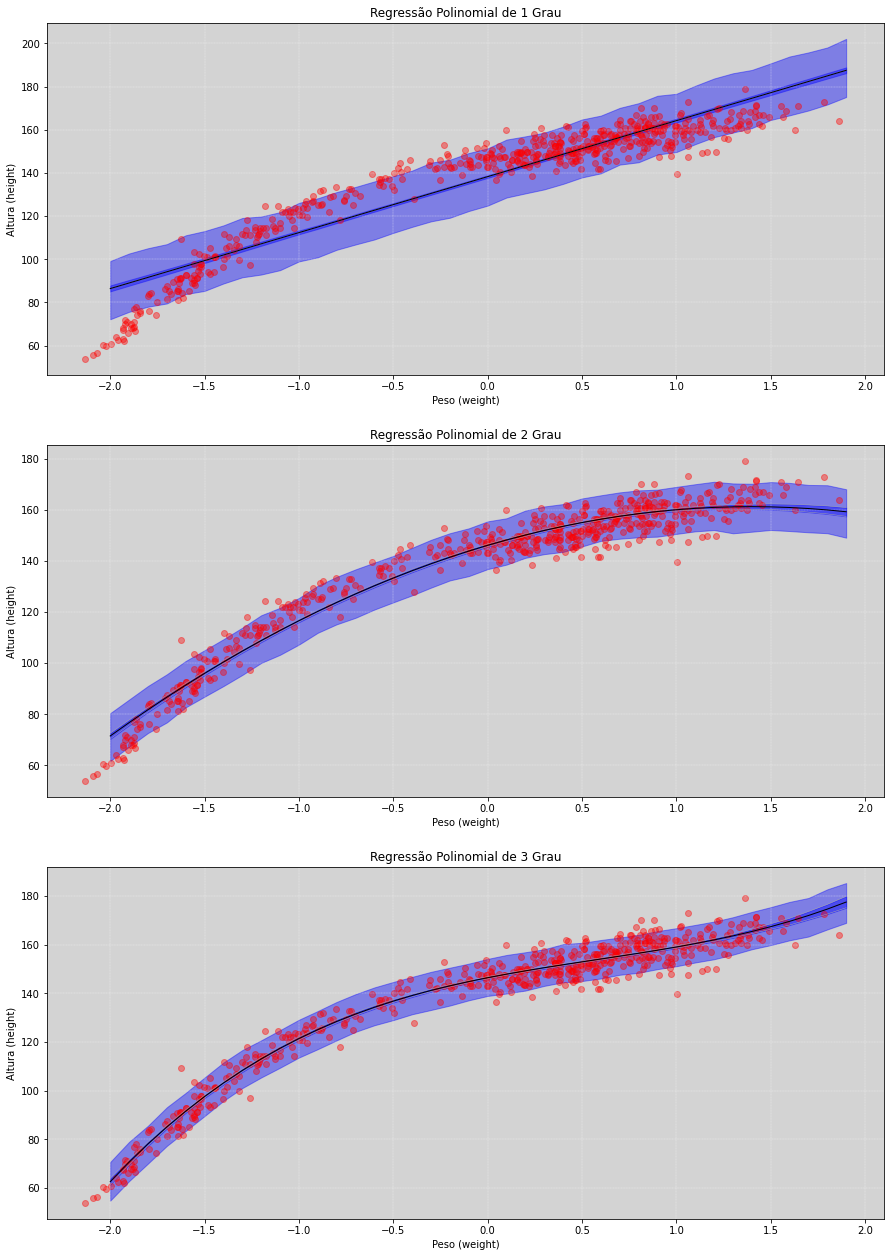

In [31]:
# ==================================================
#     Comparativo dos tr√™s modelos polinomiais 
#             de 1¬∫, 2¬∫ e 3¬∫ grau
#         para estimativa das alturas!
# ==================================================

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(15, 22))

# ===============================================================================
#     Plotando o gr√°fico de regress√£o polinomial de grau 1 - Modelo Linear
# ===============================================================================
ax1.plot(np.arange(-2, 2, 0.1), posterioris_height_HPDIs_p1_mean, color='darkgray', linewidth=0.5)
ax1.fill_between(np.arange(-2, 2, 0.1), mu_HPDI_p1[:, 0], mu_HPDI_p1[:, 1], color='blue', alpha=0.4)
ax1.fill_between(np.arange(-2, 2, 0.1), posteriori_HPDI_p1[:, 0], posteriori_HPDI_p1[:, 1], color='blue', alpha=0.4)
ax1.scatter(weight_full_std, height_full, color='red', alpha=0.4)

ax1.plot(np.arange(-2, 2, 0.1), posterioris_height_HPDIs_p1_mean, color='black', linewidth=1)
ax1.grid(ls='--', color='white', linewidth=0.3)
ax1.set_title('Regress√£o Polinomial de 1 Grau')
ax1.set_ylabel('Altura (height)')
ax1.set_xlabel('Peso (weight)')


# ===============================================================================
#     Plotando o gr√°fico de regress√£o polinomial de grau 2 - Par√°bola
# ===============================================================================
ax2.plot(np.arange(-2, 2, 0.1), posteriori_polinomial2_HPDI, color='darkgray', linewidth=0.5)
ax2.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial2_HPDI[:, 0], posteriori_polinomial2_HPDI[:, 1], color='blue', alpha=0.4)
ax2.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial2_sigma[:, 0], posteriori_polinomial2_sigma[:, 1], color='blue', alpha=0.4)
ax2.scatter(weight_full_std, height_full, color='red', alpha=0.4)

ax2.plot(np.arange(-2, 2, 0.1), posteriori_polinomial2_mean, color='black', linewidth=1)
ax2.grid(ls='--', color='white', linewidth=0.3)
ax2.set_title('Regress√£o Polinomial de 2 Grau')
ax2.set_ylabel('Altura (height)')
ax2.set_xlabel('Peso (weight)')

# ===============================================================================
#     Plotando o gr√°fico de regress√£o polinomial de grau 3 - Fun√ß√£o C√∫bica
# ===============================================================================

ax3.plot(np.arange(-2, 2, 0.1), posteriori_polinomial3_HPDI, color='darkgray', linewidth=0.5)
ax3.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial3_HPDI[:, 0], posteriori_polinomial3_HPDI[:, 1], color='blue', alpha=0.4)
ax3.fill_between(np.arange(-2, 2, 0.1), posteriori_polinomial3_sigma[:, 0], posteriori_polinomial3_sigma[:, 1], color='blue', alpha=0.4)
ax3.scatter(weight_full_std, height_full, color='red', alpha=0.4)

ax3.plot(np.arange(-2, 2, 0.1), posteriori_polinomial3_mean, color='black', linewidth=1)
ax3.grid(ls='--', color='white', linewidth=0.3)
ax3.set_title('Regress√£o Polinomial de 3 Grau')
ax3.set_ylabel('Altura (height)')
ax3.set_xlabel('Peso (weight)')

plt.plot()

O que fizemos aqui foi escolher uma forma matem√°tica polin√¥mial (*um polin√¥mio de primeiro, de segundo ou de terceiro grau*) e ajustarmos a melhor estrutura em cada um deles usando os dados da amostra.

Como temos muitos dados, a nossa incerteza tende a ficar muito pequena, o que pode nos levar a achar que o modelo est√° bem ajustado. 

```{note}
As linhas n√£o endossam o modelo. O que faz mais sentido √© que o modelo endosse as linhas!  
```

Por isso temos que saber ser cr√≠ticos com os modelos e sobre a sua estrutura geral, porque o modelo nunca far√° isso por si mesmo. `Ele n√£o tem responsabilidade e capacidade para fazer isso`. √â de nossa responsabilidade fazer essa cr√≠tica, sen√£o iremos *destruir Praga*.


Podemos perceber que essas linhas n√£o se ajustam, de modo geral, t√£o bem assim aos dados, e tamb√©m n√£o h√° muita incerteza de onde elas est√£o. Isso √© bem interessante, os intervalos de confiabilidade s√£o min√∫sculos, mas o ajuste nos dados foi um ajuste ruim, o` modelo tem pouca incerteza, mas √© um modelo ruim`. 

Outro problema dos polin√¥mios √© que ele s√£o monot√¥nicos, ou seja, depois de certo est√°gio eles tendem a seguir indefinidamente at√© o infinito. 

N√£o h√° oscila√ß√µes desse modelo! √â um modelo mais duro de manipular!

## Dores dos Polin√¥mios

- Polin√¥mios fazem previs√µes absurdas fora do range dos dados.


- Os par√¢metros influenciam cada parte do corpo da curva, isso torna dif√≠cil de se entender.


- N√£o s√£o muito flex√≠veis, podem ter curvas monot√¥nicas.


Essas perdas de estabilidade tamb√©m podem ocorrer dentro do range dos dados, iremos ver bem mais para frente um exemplo disso. 

# Splines

<img src='./images/splines_boat.jpg' alt="splines in boat" width=1000>

Ent√£o, o que fazer agora para n√£o precisarmos enfrentar os maus comportamentos dos polin√¥mios?

Existem muitas outras op√ß√µes. A que vamos ver aqui √© uma bastante comum e realmente √∫til no dia-a-dia. Mas, ainda assim, cont√≠nua sendo um modelo *geoc√™ntrico*. `Assim como todos os outros modelos!` Por isso, precisamos ter responsabilidades com o modelo e `n√£o interpreta-lo demais`.


As splines sugiram de uma motiva√ß√£o f√≠sica. `Spline` √© nome bastante estranho, mas √© apenas a *barrinha* (de madeira ou de a√ßo), como na foto acima.  Essa barra √© recuada e fixada pontualmente (*pivot point*) pelos pesos de metal ao longo de seu comprimento. Vamos chamar esses pesos de `n√≥s` (*`knots`*). Essa estrutura ainda hoje √© usada por desenhistas para tra√ßar a curvas de cascos de barcos. 

## Agindo Localmente - *B-splines*

`Splines de base`, ou no ingl√™s *basis-splines*, naturalmente s√£o chamadas de `B-splines`. S√£o fun√ß√µes que todos os seus par√¢metros t√™m efeitos locais apenas e n√£o globalmente como nos foi visto nos polin√¥mios. S√£o fun√ß√µes *wiggly*. Essa classe de fun√ß√µes √© constru√≠da com outras fun√ß√µes *wigglys* locais. 

Vamos ver um exemplo, mas devemos sempre nos lembrar de que estamos construindo um modelo *geoc√™ntrico*, e que este est√° apenas descrevendo o comportamento dos dados na estrutura do nosso modelo e n√£o explicando eles. Iremos observar esses resultados para as fazer previs√µes, portanto, devemos ter `responsabilidades sobre como funciona um modelo`.


`Fun√ß√µes de base` s√£o apenas fun√ß√µes locais, e toda a spline √© constru√≠da com interpola√ß√µes, deslizando suavemente entre essas fun√ß√µes locais, ou seja, as fun√ß√µes de base (*basis functions*). 

Para ficar mais claro, n√≥s iremos construir uma grande *wiggly functions* a partir de outras *wiggly functions* menores. Mas cada uma dessas fun√ß√µes wiggly menores tem par√¢metros locais que descrevem a sua pr√≥pria import√¢ncia. N√≥s iremos ajust√°-los e poderemos observar que n√£o ocorrer√° aquelas oscila√ß√µes bruscas como ocorreu nas regress√µes polinomiais.

```{note}
Esses modelos s√£o geralmente melhores do que os modelos polin√¥miais, mas igualmente *geoc√™ntricos*!
```

`B-Splines bayesianas` s√£o geralmente chamadas de `P-splines`. √â usado comumente em pessoas que usam *Machine Learning*. O `P` significa *penalidades* que a priori d√° para os pesos, mas foram rotulados dessa forma em contextos *n√£o bayesianos*.

Mais para frente no curso iremos ver melhor os conceitos de penalidades e ficar√° bem mais claro o seu uso.

`B-splines` s√£o apenas uma varia√ß√£o dos modelos lineares que vimos anteriormente. Tamb√©m √© um `modelo aditivo` que tem algumas vari√°veis sint√©ticas estranhas (ou seja, *n√£o observ√°veis*).

O modelo pode ser escrito da seguinte forma:

$$ \mu_i = \alpha + w_1B_{i, 1}+ w_2B_{i, 2}+ w_3B_{i, 3}+ ...  $$

Os pesos $w_i$ s√£o como as inclina√ß√µes. Isso √© meio estranho porque o preditor de interesse n√£o ir√° aparecer no modelo, no entanto, teremos uma aproxima√ß√£o fant√°stica da rela√ß√£o entre os preditores de interesse e o resultado. 

```{warning}
Parece estranho, mas funciona super bem.
```

As fun√ß√µes de bases (*basis functions*) $B$ s√£o vari√°veis sint√©ticas. Internamente elas s√£o termos quadr√°ticos ou termos c√∫bicos. Mas note que os dados n√£o foram usados para construir $B$. Os valores de $B$ associam pesos em diferentes regi√µes da vari√°vel $x$.


Vamos construir um exemplo, passo-a-passo, de como construir um modelos de tipo.

Para isso, vamos utilizar os dados do Milenar Festival de Flores de Cerejeira no Jap√£o.

## Festival das Flores de Cerejeira

<img src='./images/cherry_blossoms.jpg' alt='Cherry Blossoms' width=1000>

*Cherry blossoms at Sugimura park, Hashimoto*
[Wikipedia](https://en.wikipedia.org/wiki/Cherry_blossom)

Agora iremos usar os dados do hist√≥rico do festival japon√™s das flores de cerejeiras. O primeiro registro de uma flor de cerejeira nesse festival foi registrada a $1200$ anos atr√°s e, agora, n√≥s temos esses dados para podermos explorar e entend√™-los melhor.

Na nossa base de dados temos a vari√°vel tempo, `year`, correspondente a cada ano de coleta dos dados. Temos os dados da √©poca da flora√ß√£o e tamb√©m dados da temperatura. A temperatura tem influ√™ncia direta na flora√ß√£o das √°rvores pelo natural processo biol√≥gico.

Como podemos imaginar, essa rela√ß√£o √© afetada pelas oscila√ß√µes dos processos clim√°ticos ao longo dos anos. Por agora n√≥s iremos olhar para os dados da temperatura ao longo dos anos. Mas para frente ao longo do curso, iremos relacionar mais vari√°veis.

Fique como exerc√≠cio construir um modelo linear da `temperatura` explicando a `data do florecimento` (*doy*), existe um relacionamento muito forte e entenderemos o porqu√™ disso. 

In [32]:
cherry_df = pd.read_csv('./data/cherry_blossoms.csv', sep=';')
cherry_df.describe()

year         doy         temp   temp_upper   temp_lower
count  1215.000000  827.000000  1124.000000  1124.000000  1124.000000
mean   1408.000000  104.540508     6.141886     7.185151     5.098941
std     350.884596    6.407036     0.663648     0.992921     0.850350
min     801.000000   86.000000     4.670000     5.450000     0.750000
25%    1104.500000  100.000000     5.700000     6.480000     4.610000
50%    1408.000000  105.000000     6.100000     7.040000     5.145000
75%    1711.500000  109.000000     6.530000     7.720000     5.542500
max    2015.000000  124.000000     8.300000    12.100000     7.740000

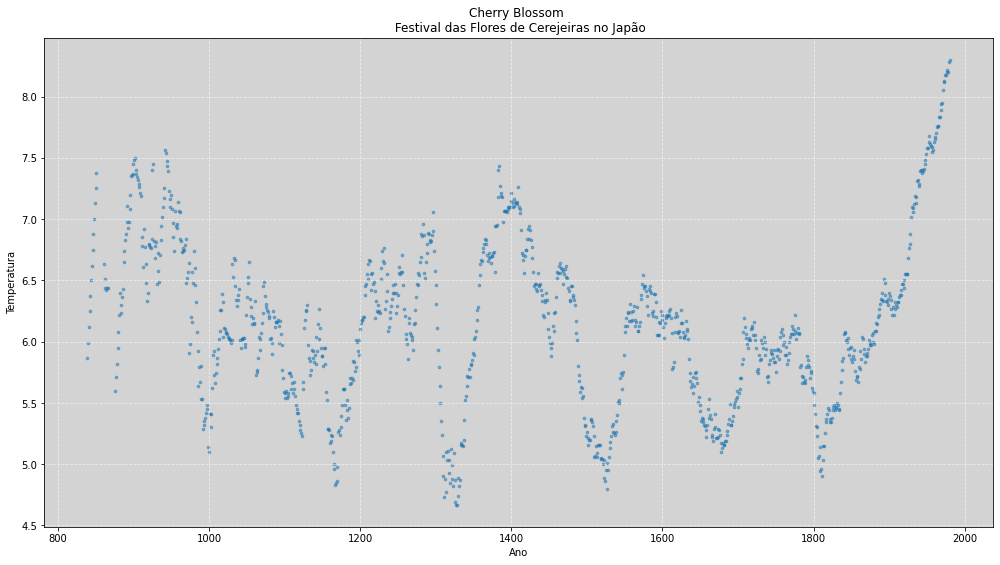

In [33]:
plt.figure(figsize=(17, 9))

plt.scatter(cherry_df.year, cherry_df.temp, marker='o', alpha=0.5, s=7)
plt.title('Cherry Blossom \n Festival das Flores de Cerejeiras no Jap√£o')
plt.xlabel('Ano')
plt.ylabel('Temperatura')
plt.grid(ls='--', color='white', alpha=0.6)
plt.show()

Nosso objetivo aqui √© construir uma tend√™ncia com esses registros de temperaturas, o que significa que queremos estimar uma spline para esses dados.


Se quisermos observar uma tend√™ncia em uma determida escala para compar√°-l√°s a algum movimento, ent√£o iremos precisar construir uma tend√™ncia em uma escala espec√≠fica.


O que iremos fazer aqui √© trabalhar com a ideia de obter alguma aproxima√ß√£o da s√©rie com alguma qualidade arbitr√°ria. N√≥s iremos come√ßar com uma `aproxima√ß√£o bastante ruim` para entender as *wiggly functions* e ap√≥s isso iremos construir modelos mais complexos e com melhores aproxima√ß√µes usando uma *`B-splines`*.

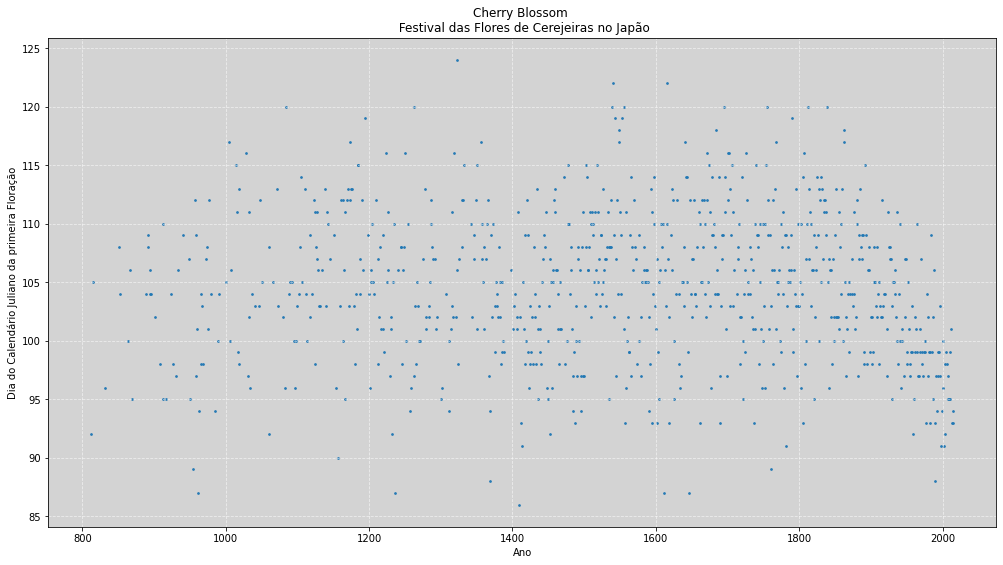

In [34]:
# ===================================================
#     Gr√°fico de Primeiro dia de Flora√ß√£o x anos
# ===================================================

plt.figure(figsize=(17, 9))

plt.scatter(cherry_df.year, cherry_df.doy, marker='o', alpha=0.9, s=3)
plt.title('Cherry Blossom \n Festival das Flores de Cerejeiras no Jap√£o')
plt.xlabel('Ano')
plt.ylabel('Dia do Calend√°rio Juliano da primeira Flora√ß√£o')
plt.grid(ls='--', color='white', alpha=0.6)
plt.show()

### Como as splines funcionam?

Aqui est√° um passo a passo de como construirmos uma splines.


- **Escolha alguns n√≥s (*knots*)**: localiza√ß√£o da vari√°vel preditora onde a spline √© ancorada! Assim determinaremos o local onde aquelas pe√ßas pesadas ir√£o estar ao longo da barrinha. Matem√°ticamente s√£o os pontos de base fazem o piv√¥ e determinam as lacunas entre as splines de base. 


- **Escolha os graus da fun√ß√£o de base**: o quanto √© *wiggly*. Iremos demonstrar graficamente esse conceito sobre a utiliza√ß√£o dos graus no decorrer da explica√ß√£o. 


- **Encontre a distribui√ß√£o √† posteriori dos pesos**: como anteriormente iremos fazer a estimativa bayesiana dos pesos, muito pr√≥ximos como fizemos nos outos modelos de regress√£o.

### Knots - Como escolher os pontos?

Exite uma ampla literatura sobre abordagens de como devemos escolher esses pontos. Uma dos m√©todos mais comuns e eficientes s√£o distribu√≠-los de acordo com seus *quantis*, pois assim podemos distribuir mais pontos onde h√° um ac√∫mulo maior dos dados. 

Geralmente pacotes e livrarias computacionais j√° nos trazem essas escolhas de modo autom√°tico e, de uma certa forma, m√°gicos! N√≥s iremos construir todo o modelo manualmente, para que possamos entender os seus detalhes de seu funcionamento. 

O que vamos propor √© colocar um *knot* na mediana, um *knot* em cada extremidade e outros dois nos centros laterais, conforme mostrado no gr√°fico abaixo.

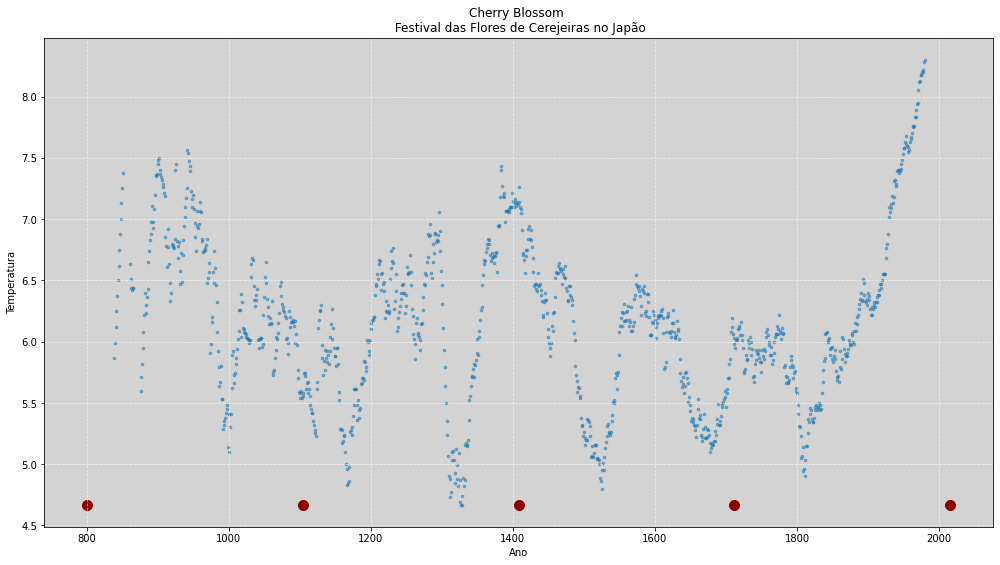

In [35]:
# Configurando a vari√°vel de tempo.
year = cherry_df.year.values

qty_knots = 5  # Quantidade de n√≥s que iremos usar.
knots_array = np.linspace(0, 1, qty_knots)

# Ref: https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html?highlight=isfinite#numpy.isfinite
year = year[np.isfinite(year)]  # Removendo os elementos NaN's

# Encontrando os knots tomando como base os quantiles
knots = np.quantile(year, knots_array)
knots = [int(x) for x in knots]  # Convertendo os valores do Knots para inteiro

# Plotando os pontos dos n√≥s - Knots.
plt.figure(figsize=(17, 9))

plt.scatter(cherry_df.year, cherry_df.temp, marker='o', alpha=0.5, s=7)
plt.scatter(knots, np.ones(len(knots)) * min(cherry_df.temp[cherry_df.temp > 0]), s=100, color='darkred')

plt.title('Cherry Blossom \n Festival das Flores de Cerejeiras no Jap√£o')
plt.xlabel('Ano')
plt.ylabel('Temperatura')
plt.grid(ls='--', color='white', alpha=0.6)
plt.show()

Vamos agora construir as splines em seus n√≥s (*knots*). Iremos desenhar abaixo todas as vari√°veis sint√©ticas. Os valores das vari√°veis sint√©ticas s√£o constru√≠das ao longo de todo intervalo da vari√°vel `ano`. E ent√£o queremos interpolar os dados.

Uma das maneiras de se pensar a respeito disso √© pensar o ano como uma vari√°vel na qual nunca iremos usar novamente, usaremos apenas para definir os *knots* como √¢ncoras sobre alguns anos espec√≠ficos, mas nunca usaremos esses dados novamente.

Para come√ßar, iremos construir algumas simples `fun√ß√µes de base` (*basis functions*). Vamos come√ßar com as fun√ß√µes de bases  mais simples, fun√ß√µes de base de grau 1, o que √© uma linha reta. Com isso iremos construir uma *wiggly functions* composta de v√°rias fun√ß√µes de base de primeiro grau, que s√£o a jun√ß√µes daquelas linhas retas.

<img src="./images/splines_2.jpg" alt="splines com pesos" width=500>

Para a constru√ß√£o das splines, iremos usar a fun√ß√£o dispon√≠vel na biblioteca *SciKit Learn* e sua documenta√ß√£o pode ser acessada [clicando aqui.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html#examples-using-)

In [36]:
from sklearn.preprocessing import SplineTransformer

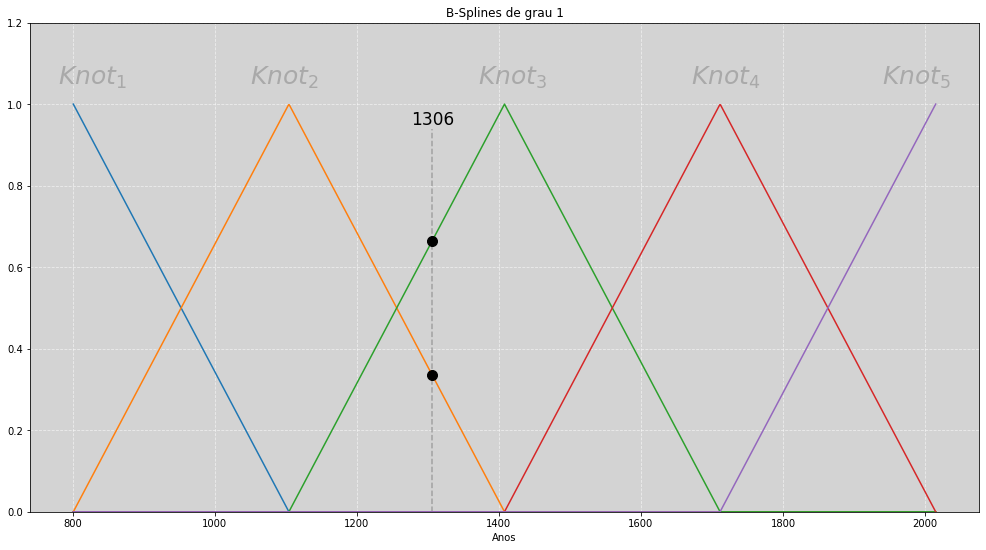

In [37]:
# ======================================
#     Construindo a Spline - Ordem 1
# ======================================

x = np.arange(year.min(), year.max()+1).reshape((year.max() - year.min() + 1), 1)

spline_1 = SplineTransformer(degree=1, n_knots=5)  # √â utilizado um intervalo equidistante entre os quantis, por padr√£o. 
spline_1 = spline_1.fit_transform(x)
plt.figure(figsize=(17, 9))

plt.plot(x, spline_1)

marco_eixo_x = 1306  # Local no eixo X que a linha tracejada ser√° plotada
marco_eixo_y_cima = spline_1[marco_eixo_x - cherry_df.year.min(), 2]
marco_eixo_y_baixo = spline_1[marco_eixo_x - cherry_df.year.min(), 1]

plt.vlines(marco_eixo_x, 0, 0.94, color='gray', ls='--', alpha=0.6)  # Linha tracejada vertical

plt.plot(marco_eixo_x, marco_eixo_y_cima, marker='o', color='black', ms=10)  # Ponto de marca√ß√£o de cima
plt.plot(marco_eixo_x, marco_eixo_y_baixo, marker='o', color='black', ms=10)  # Ponto de marca√ß√£o de baixo

plt.text(marco_eixo_x - 30, 0.95, str(marco_eixo_x), size=17, color='black')

plt.title('B-Splines de grau 1')
plt.xlabel('Anos')
plt.text(780, 1.05,'$Knot_1$', size=25, color='darkgray')
plt.text(1050, 1.05,'$Knot_2$', size=25, color='darkgray')
plt.text(1370, 1.05,'$Knot_3$', size=25, color='darkgray')
plt.text(1670, 1.05,'$Knot_4$', size=25, color='darkgray')
plt.text(1940, 1.05,'$Knot_5$', size=25, color='darkgray')

plt.grid(ls='--', color='white', alpha=0.6)
plt.ylim((0, 1.2))
plt.show()

Assim como as splines para os desenhistas, n√≥s, estat√≠sticos, usamos elas de modos semelhantes em matem√°tica. No gr√°fico acima plotamos $5$ fun√ß√µes de bases (*basis-functions*) tendo como ponto central os n√≥s (*knots*) que definimos anteriormente.


Para entendermos o funcionamento dessa estrutura, temos que perceber 2 coisas: Os dois pontos pretos que est√£o plotados no gr√°fico acima, esses pontos sempre estar√£o sobre 2 fun√ß√µes de base, por exemplo na fun√ß√£o referente ao n√≥ 2 *($knot_2$)* e ao n√≥ 3 *($knot_3$)*. Isso sempre ser√° verdade, exceto quando a posi√ß√£o do `eixo x` estiver exatamente sobre a posi√ß√£o de alguns do n√≥s. 


A pr√≥xima observa√ß√£o √© que cada uma das fun√ß√µes de base ser√° multiplicada por um n√∫mero, esse n√∫mero ir√° modificar a sua estrutura podendo aumenta-l√° ou a encurtar. Esse peso, como veremos mais adiante, ser√° rotulado de $w$. Assim, ap√≥s essa modifica√ß√£o ser aplicada em todas as curvas, iremos somar todos os pontos pretos e obteremos a nossa *B-spline*, ou seja, uma nova curva que √© a resultante da soma de todas as curvas multiplicadas por seus respectivos pesos.

O interessante que notamos aqui √© que, na regress√£o polinomial usamos as vari√°veis explicativas (*$X$*) da nossa amostra com alguns ajustes, elevado ao quadrado ou elevado ao cubo, para constru√ß√£o do nosso modelo. No modelo de splines que iremos construir, a vari√°vel explicativa √© uma vari√°vel sint√©tica, ou seja, `uma vari√°vel que n√≥s criamos e que n√£o tem nenhuma rela√ß√£o com o modelo em si`.

O que buscamos com o modelo de splines √© estimar **quais seriam os pesos mais plaus√≠veis** que melhor descreve nossos dados. Parece muito estranho fazer isso, mais funciona muito bem! 

Vamos ver um exemplo de como isso acontece... 

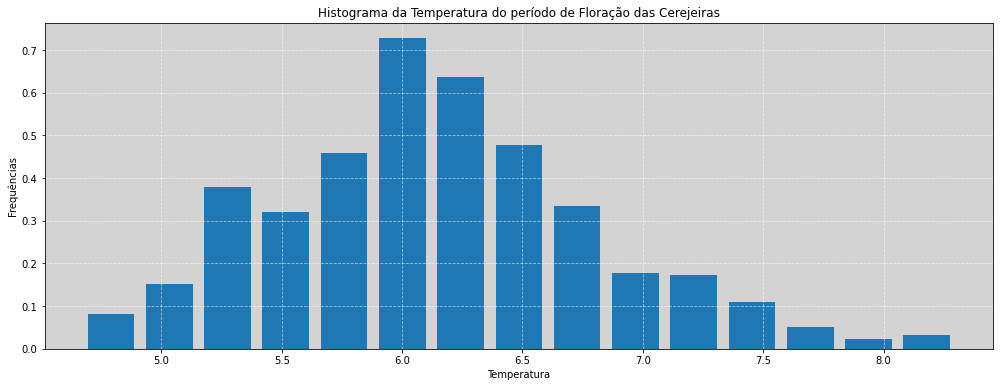

In [38]:
plt.figure(figsize=(17, 6))
plt.hist(cherry_df.temp, bins=15, rwidth=0.8, density=True)
plt.grid(ls='--', color='white', alpha=0.6)

plt.title('Histograma da Temperatura do per√≠odo de Flora√ß√£o das Cerejeiras')
plt.xlabel('Temperatura')
plt.ylabel('Frequ√™ncias')
plt.show()

Com as splines definidas acima, iremos construir nosso modelo em *Stan* para estimar a temperatura em cada ano da flora√ß√£o das cerejeiras. Iremos supor que a temperatura √© distribu√≠da normalmente, conforme gr√°fico acima.

O modelo matem√°tico ser√° descrito como:

$$ temperatura \sim normal(\mu, \sigma) $$

no qual a m√©dia, $\mu$, ser√° constru√≠da da seguinte forma:

$$ \mu = \alpha + w_1  B_{i, 1} + w_2  B_{i, 2} + w_3  B_{i, 3} + w_4  B_{i, 4} +  w_5  B_{i, 5}$$

Para evitar de termos que escrever todos os termos na m√£o dentro da *stan*, podemos reescrever a equa√ß√£o acima da seguinte forma:

$$ \mu = \alpha + w_k  B_{i, k} $$

Essa nota√ß√£o matem√°tica converte a equa√ß√£o acima para uma simples multiplica√ß√£o de matrizes, conforme vimos no ensino m√©dio, e assim, tanto evitamos reescrever todos os termos manualmente quanto conseguirmos otimizar os custos computacionais envolvidos nos c√°lculos. (*Geralmente √© sempre uma boa ideia utilizar matrizes.*)

In [39]:
# ==================================
#   Construindo o modelo b-spline
# ==================================

model_spline_1 = """
    data {
        int<lower=0> N;  // N√∫mero de observa√ß√µes
        int<lower=0> K;  // N√∫mero de Knots
        matrix[N, K] B;  // B-splines
        vector[N] temp;  // Vari√°vel resposta (y)
    }

    parameters {
        real<lower=0> sigma;
        real alpha;
        vector[K] w;  // Pesos
    }

    model {
        alpha ~ normal(100, 10);  // Priori para alpha
        w ~ normal(0, 1);         // Priori para w
        sigma ~ exponential(1);   // Priori para sigma
        
        temp ~ normal(alpha + B * w, sigma);  // Verossimilhan√ßas (Likelohood)
    }
"""

N = np.shape(spline_1)[0]  # N√∫mero de amostras
K = np.shape(spline_1)[1]  # N√∫mero de n√≥s (knots)

dados = {
    'N': N,
    'K': K,
    'B': np.matrix(spline_1),
    'temp': cherry_df.temp.fillna(cherry_df.temp.mean()).values,  # Colocando os valores NA como m√©dia da s√©rie.
}

posteriori_spline_1 = stan.build(model_spline_1, data=dados)
fit_spline_1 = posteriori_spline_1.sample(num_chains=4, num_samples=1000)

alpha_spline_1 = fit_spline_1['alpha']
w_spline_1 = fit_spline_1['w']
sigma_spline_1 = fit_spline_1['sigma'].flatten()

Bw_spline_1 = np.matmul(spline_1, w_spline_1)  # Fazendo a multiplica√ß√£o das matrizes B * w 

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_vg7jd5_2/model_gujiwcol.stan', line 16, column 23: Argument 100 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   1% (100/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   6% (500/8000)
Sampling:   9% (700/8000)
Sampling:  11% (900/8000)
Sampling:  14% (1100/8000)
Sampling:  16% (1300/8000)
Sampling:  19% (1500/8000)
Sampling:  21% (1700/8000)
Sampling:  24% (1900/8000)
Sampling:  26% (2100/8000)
Sampling:  29% (2300/8000)
Sampling:  32% (2600/8000)
Sampling:  35% (2800/8000)
Sampling:  38% (3000/8000)
Sampling:  45% (3600/8000)
Sampling:  60% (4800/8000)
Sampling:  76% (6100/8000)
Sampling:  91% (7300/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per

Com o modelo ajustado, temos a estimativa do par√¢metro $w$, que s√£o os pesos de cada uma das fun√ß√µes de base. Para sabermos qual o efeito gerado de cada um desses pesos, iremos aplic√°-los nas fun√ß√µes, multiplicamos ambos:

$$ \mbox{Bw_spline_1} = w_k B_{1, k} $$

O resultado dessa opera√ß√£o pode ser visto no gr√°fico abaixo.

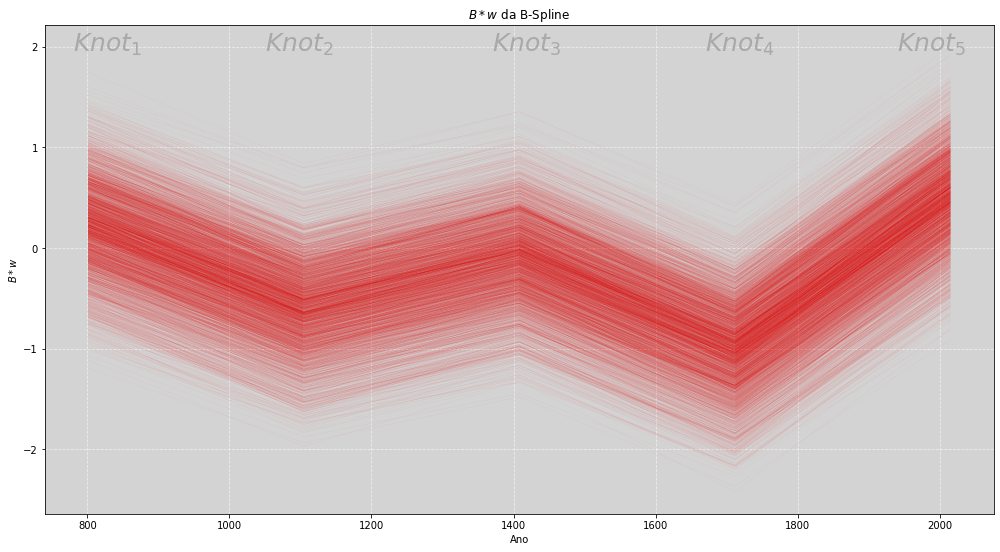

In [40]:
# ====================================================
#    Plot da Posteriori do Mu da B-Spline de Grau 1
# ====================================================
plt.figure(figsize=(17, 9))

plt.plot(cherry_df.year,  Bw_spline_1,  # Plot do B * w
         color='red', linewidth=0.2, alpha=0.1) 
 
plt.title('$B*w$ da B-Spline')
plt.xlabel('Ano')
plt.ylabel('$B*w$')
plt.grid(ls='--', color='white', alpha=0.6)

plt.text(780, 1.95,'$Knot_1$', size=25, color='darkgray')
plt.text(1050, 1.95,'$Knot_2$', size=25, color='darkgray')
plt.text(1370, 1.95,'$Knot_3$', size=25, color='darkgray')
plt.text(1670, 1.95,'$Knot_4$', size=25, color='darkgray')
plt.text(1940, 1.95,'$Knot_5$', size=25, color='darkgray')

plt.show()

Para conseguirmos verificar a estimativa da temperatura de modo visual, somaremos, ao valor de `Bw_spline_1` o valor `alpha_spline_1`, que √© a estimativa do valor m√©dio da temperatura. Veja a seguir o gr√°fico. 

Assim como em outros modelos anteriores, temos a regi√£o de plausibilidade dada pelas retas em cada um dos n√≥s. Apesar de termos apenas $5$ n√≥s, a estimativa para $\mu$ √© muito boa.

Para termos uma estimativa mais detalhada, `devemos aumentar o n√∫mero de n√≥s e tamb√©m alterar o grau das fun√ß√µes de bases usadas`. Quando maior o n√∫mero de n√≥s e, tamb√©m, maior o n√∫mero do grau das fun√ß√µes de base, tendemos a ter um ajuste mais preciso.

Um ajuste preciso pode ser preocupante e estragar nosso dia., O motivo disso √© um efeito conhecido como `overffiting`. Iremos tratar disso mais adiante, mas de modo geral *overffting*, ou sobreajuste, √© a capacidade do modelo identificar detalhes minuciosos na amostra, mas n√£o conseguir ser bom em identificar os detalhes na popula√ß√£o. 

<img src="./images/overffiting.jpg" alt="overffiting example" width=500>

Por enquanto, iremos apenas entender como √© o funcionamento de uma spline e, em cap√≠tulos posteriores, veremos mais detalhes sobre o fantasma do `overffiting` em nossos modelos.

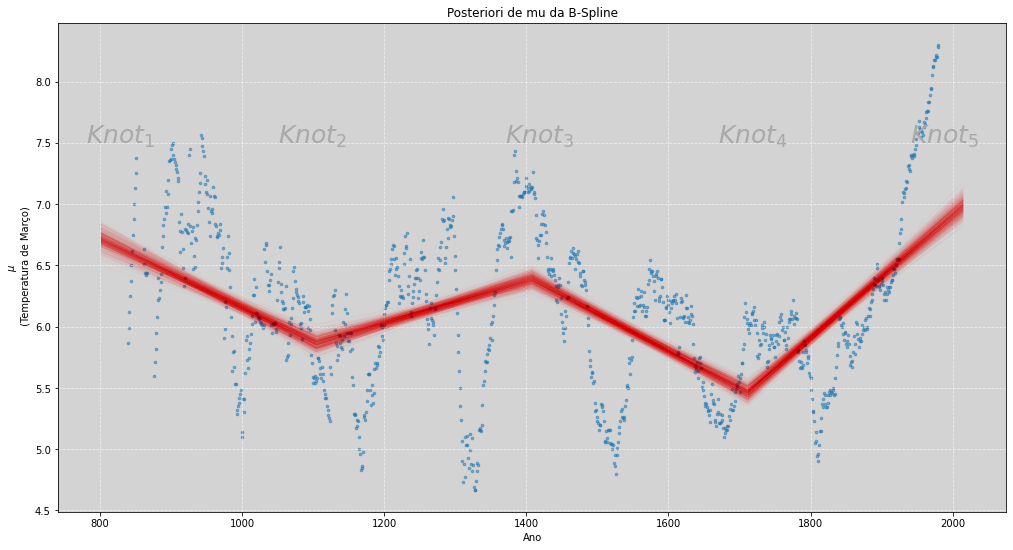

In [41]:
# ======================================================
#    Plot da Posteriori de mu da B-Spline de Grau 1
# ======================================================
plt.figure(figsize=(17, 9))

n_plot = 1000  # Define a quantidade de simula√ß√µes para o plot

plt.scatter(cherry_df.year, cherry_df.temp, marker='o', alpha=0.5, s=7)  # Plot da amostra
plt.plot(cherry_df.year, alpha_spline_1[:, :n_plot] + Bw_spline_1[:, :n_plot],  # mu
         color='red', linewidth=0.1, alpha=0.1) 
 
plt.title('Posteriori de mu da B-Spline')
plt.xlabel('Ano')
plt.ylabel('$\mu$ \n (Temperatura de Mar√ßo)')
plt.grid(ls='--', color='white', alpha=0.6)

plt.text(780,  7.5,'$Knot_1$', size=25, color='darkgray')
plt.text(1050, 7.5,'$Knot_2$', size=25, color='darkgray')
plt.text(1370, 7.5,'$Knot_3$', size=25, color='darkgray')
plt.text(1670, 7.5,'$Knot_4$', size=25, color='darkgray')
plt.text(1940, 7.5,'$Knot_5$', size=25, color='darkgray')

plt.show()

In [52]:
# ==========================================================
#      Reamostragem da Posteriori B-Spline de Grau 1 
# ==========================================================

posteriori_spline_1 = np.random.normal(alpha_spline_1 + Bw_spline_1, sigma_spline_1)  # Amostras normal(mu, sigma)

intervalo_credibilidade = 0.96  # Intervalo de credibilidade - HPDI

HPDI_posteriori_spline_1 = [] # Vetor do HPDI

for year_i in range(np.shape(posteriori_spline_1)[0]):  # OBS: Essa opera√ß√£o √© um pouco demorada. 
    HPDI_posteriori_spline_1.append(HPDI(posteriori_spline_1[year_i, :], intervalo_credibilidade))

HPDI_posteriori_spline_1 = np.array(HPDI_posteriori_spline_1)
mean_posteriori_spline_1 = posteriori_spline_1.mean(axis=1)  # M√©dia do HPDI por cada ano

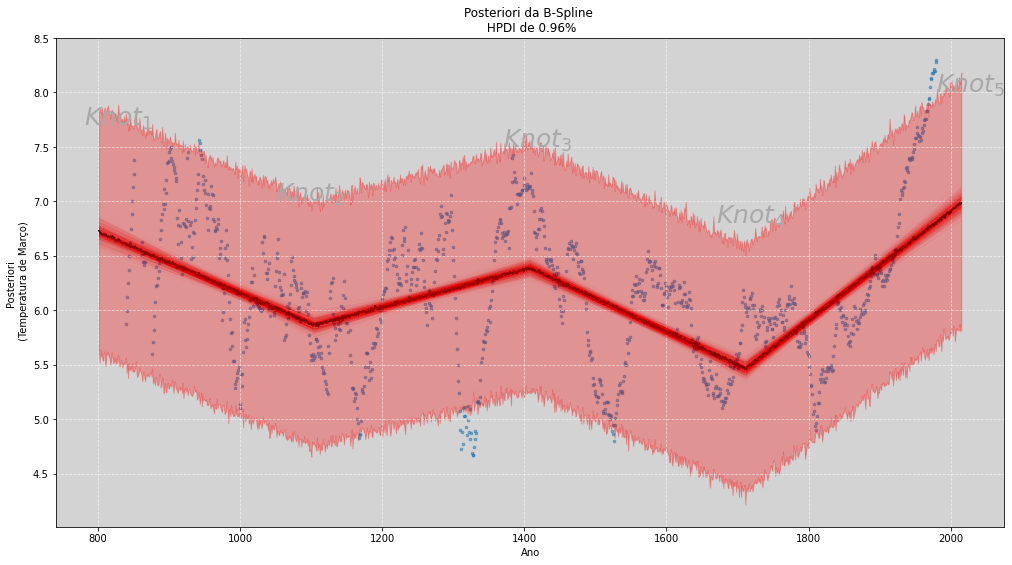

In [53]:
# ===============================================
#    Plot da Posteriori da B-Spline de Grau 1
# ===============================================
plt.figure(figsize=(17, 9))

plt.scatter(cherry_df.year, cherry_df.temp, marker='o', alpha=0.5, s=7)  # Plot da amostra

plt.fill_between(cherry_df.year, HPDI_posteriori_spline_1[:, 0], HPDI_posteriori_spline_1[:, 1],  # Plot HPDI
         color='red', alpha=0.3, label='HPDI da Posteriori') 

plt.plot(cherry_df.year, mean_posteriori_spline_1, color='black', label='M√©dia da posteriori')  # Plot da M√©dia

plt.plot(cherry_df.year, alpha_spline_1[:, :n_plot] + Bw_spline_1[:, :n_plot],  # Plot do Intevalo da M√©dia (Sem o HPDI)
         color='red', linewidth=0.1, alpha=0.1) 

plt.title('Posteriori da B-Spline \n HPDI de ' + str(intervalo_credibilidade) + '%')
plt.xlabel('Ano')
plt.ylabel('Posteriori \n (Temperatura de Mar√ßo)')
plt.grid(ls='--', color='white', alpha=0.6)

plt.text(780,  7.7,'$Knot_1$', size=25, color='darkgray')
plt.text(1050, 7.0,'$Knot_2$', size=25, color='darkgray')
plt.text(1370, 7.5,'$Knot_3$', size=25, color='darkgray')
plt.text(1670, 6.8,'$Knot_4$', size=25, color='darkgray')
plt.text(1980, 8.0,'$Knot_5$', size=25, color='darkgray')

plt.show()

Agora que entendemos como √© a constru√ß√£o de uma spline e como ajustar elas aos dados, iremos construir as mesmas estimativas usando as splines que mais s√£o usadas nos dia a dia. A capacidade de infer√™ncia de uma spline com grau maior que o utilizado no exemplo anterior e, tamb√©me a adi√ß√£o de mais pontos ao longo do eixo $x$ permite um ajuste muito melhor que aquele que fizemos no exemplo anterior. 

A seguir a descri√ß√£o e a constru√ß√£o uma `spline` com grau 3 e 15 n√≥s ao longo do eixo.

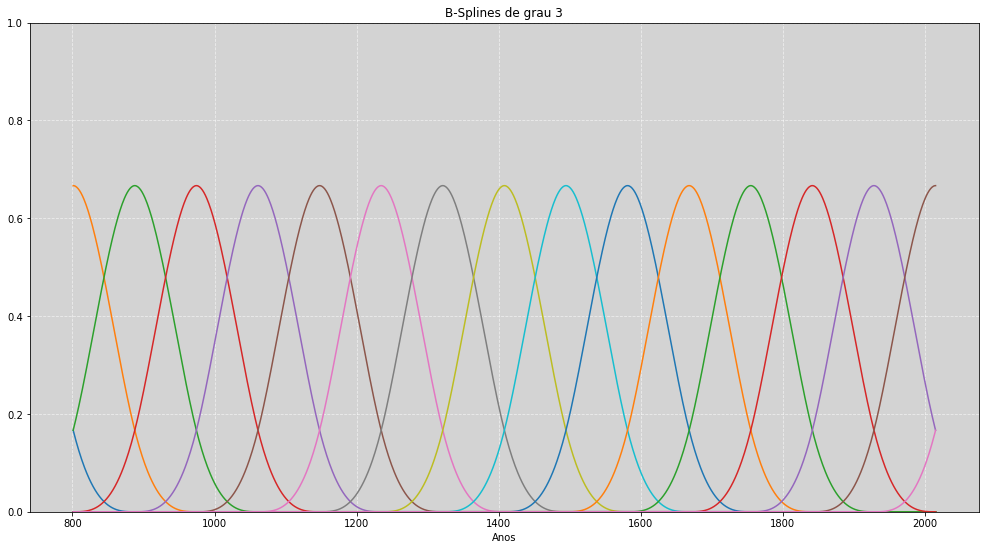

In [54]:
# ======================================
#      Construindo a Spline - Ordem 3
# ======================================

x = np.arange(year.min(), year.max()+1).reshape((year.max() - year.min() + 1), 1)

spline_3 = SplineTransformer(degree=3, n_knots=15)  # √â utilizado um intervalo equidistante entre os quantis, por padr√£o. 
spline_3 = spline_3.fit_transform(x)
plt.figure(figsize=(17, 9))

plt.plot(x, spline_3)

plt.title('B-Splines de grau 3')
plt.xlabel('Anos')
plt.grid(ls='--', color='white', alpha=0.6)
plt.ylim((0, 1))
plt.show()

In [55]:
# =======================================================
#   Construindo o modelo b-spline de grau 3 com 15 n√≥s
# =======================================================

# Perceba que o modelo de grau 3 ter√° a mesma estrutura do modelo de grau 1 
model_spline_3 = """
    data {
        int<lower=0> N;  // N√∫mero de observa√ß√µes
        int<lower=0> K;  // N√∫mero de Knots
        matrix[N, K] B;  // B-splines
        vector[N] temp;  // Vari√°vel resposta (y)
    }

    parameters {
        real<lower=0> sigma;
        real alpha;
        vector[K] w;  // Pesos
    }

    model {
        alpha ~ normal(100, 10);  // Priori para alpha
        w ~ normal(0, 1);         // Priori para w
        sigma ~ exponential(1);   // Priori para sigma
        
        temp ~ normal(alpha + B * w, sigma);  // Verossimilhan√ßas (Likelohood)
    }
"""

N = np.shape(spline_3)[0]  # N√∫mero de amostras
K = np.shape(spline_3)[1]  # N√∫mero de n√≥s (knots)

dados = {
    'N': N,
    'K': K,
    'B': np.matrix(spline_3),
    'temp': cherry_df.temp.fillna(cherry_df.temp.mean()).values,  # Colocando os valores NA como m√©dia da s√©rie.
}

posteriori_spline_3 = stan.build(model_spline_3, data=dados)
fit_spline_3 = posteriori_spline_3.sample(num_chains=4, num_samples=1000)

alpha_spline_3 = fit_spline_3['alpha']
w_spline_3 = fit_spline_3['w']
sigma_spline_3 = fit_spline_3['sigma'].flatten()

Bw_spline_3 = np.matmul(spline_3, w_spline_3)  # Fazendo a multiplica√ß√£o das matrizes B * w

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_vg7jd5_2/model_gujiwcol.stan', line 16, column 23: Argument 100 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (401/8000)
Sampling:   6% (501/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  

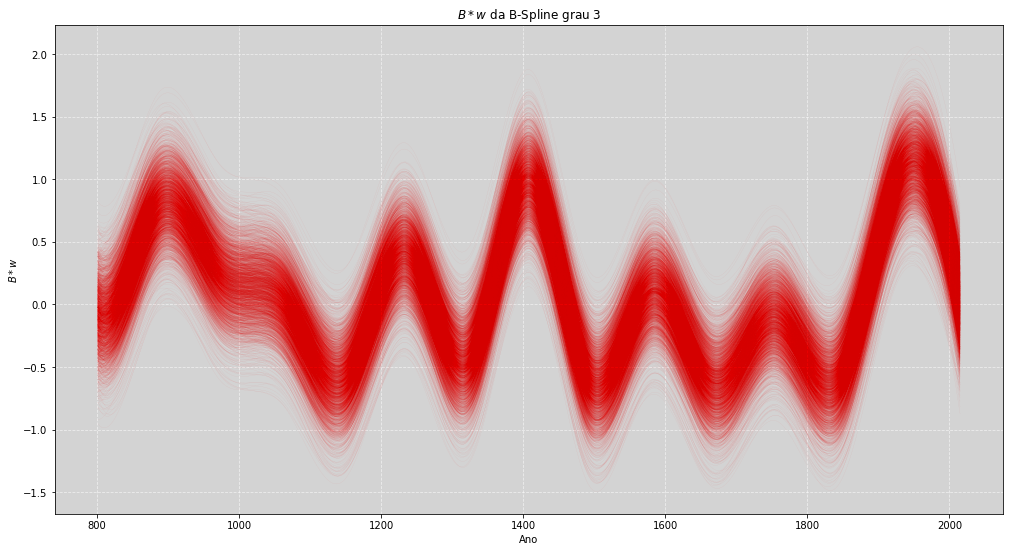

In [56]:
# ====================================================
#    Plot da Posteriori do Mu da B-Spline de Grau 3
# ====================================================
plt.figure(figsize=(17, 9))

plt.plot(cherry_df.year,  Bw_spline_3,  # Plot do B * w
         color='red', linewidth=0.2, alpha=0.1) 
 
plt.title('$B*w$ da B-Spline grau 3')
plt.xlabel('Ano')
plt.ylabel('$B*w$')
plt.grid(ls='--', color='white', alpha=0.6)

plt.show()

In [57]:
# ==========================================================
#      Reamostragem da Posteriori B-Spline de Grau 3 
# ==========================================================

posteriori_spline_3 = np.random.normal(alpha_spline_3 + Bw_spline_3, sigma_spline_3)  # Amostras normal(mu, sigma)

# Intervalo de credibilidade - HPDI
#  Lembre-se: a velocidade do c√°lculo do HPDI √© t√£o mais r√°pido quando 
#             mais pr√≥ximo de 1 estiver o valor do intervalo_credibilidade
#  Altere esses valores para perceber a abertura do intevalo de credibilidade sobre os dados.
intervalo_credibilidade = 0.97

HPDI_posteriori_spline_3 = [] # Vetor do HPDI

for year_i in range(np.shape(posteriori_spline_3)[0]):  # XXX: Essa opera√ß√£o √© um pouco demorada. 
    HPDI_posteriori_spline_3.append(HPDI(posteriori_spline_3[year_i, :], intervalo_credibilidade))

HPDI_posteriori_spline_3 = np.array(HPDI_posteriori_spline_3)
mean_posteriori_spline_3 = posteriori_spline_3.mean(axis=1)  # M√©dia do HPDI por cada ano

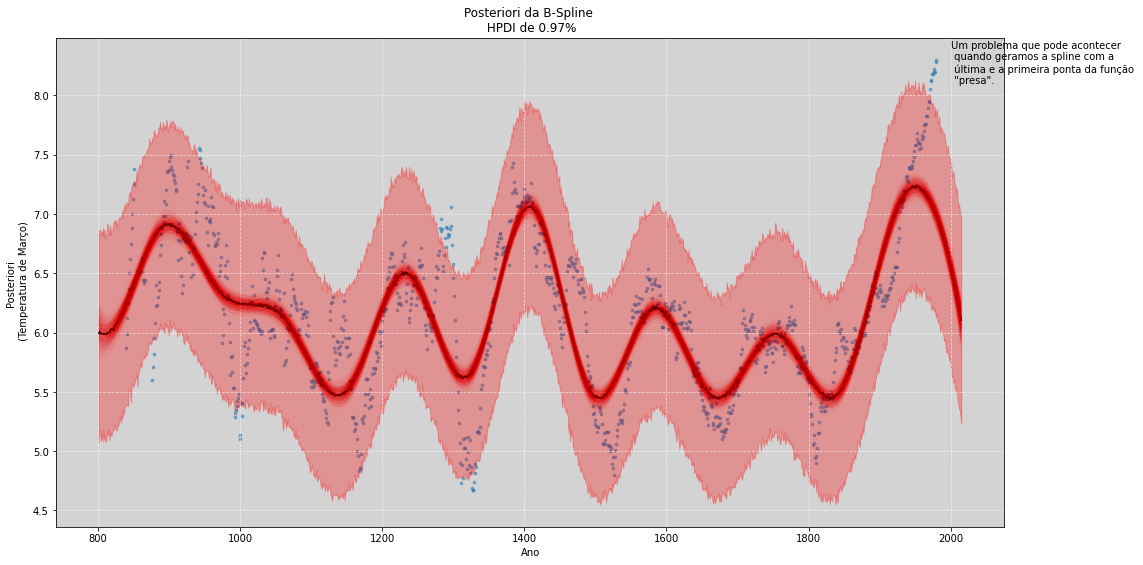

In [58]:
# ===============================================
#    Plot da Posteriori da B-Spline de Grau 3
# ===============================================
plt.figure(figsize=(17, 9))

plt.scatter(cherry_df.year, cherry_df.temp, marker='o', alpha=0.5, s=7)  # Plot da amostra

plt.fill_between(cherry_df.year, HPDI_posteriori_spline_3[:, 0], HPDI_posteriori_spline_3[:, 1],  # Plot HPDI
         color='red', alpha=0.3, label='HPDI da Posteriori') 

plt.plot(cherry_df.year, mean_posteriori_spline_3, color='black', label='M√©dia da posteriori')  # Plot da M√©dia

plt.plot(cherry_df.year, alpha_spline_3[:, :n_plot] + Bw_spline_3[:, :n_plot],  # Plot do Intevalo da M√©dia (Sem o HPDI)
         color='red', linewidth=0.1, alpha=0.1) 

plt.title('Posteriori da B-Spline \n HPDI de ' + str(intervalo_credibilidade) + '%')
plt.xlabel('Ano')
plt.ylabel('Posteriori \n (Temperatura de Mar√ßo)')
plt.grid(ls='--', color='white', alpha=0.6)

plt.text(2000, 8.1, 'Um problema que pode acontecer \n quando geramos a spline com a \n √∫ltima e a primeira ponta da fun√ß√£o \n "presa".')

plt.show()

## Possibilidades das Splines

- A quantidade de n√≥s e os graus das fun√ß√µes de base s√£o de nossa escolha.

Exitem muitas maneiras diferente de se definir uma *spline*, assim como existem muitos outros tipos de *splines*. As que vimos aqui foram as splines mais simples. 

Obs: No curso a defini√ß√£o das b-splines s√£o um pouco diferente das que usamos aqui. Para saber com √© o formato das fun√ß√µes que o Richard usa ver a aula [Statistical Rethinking Winter 2019 Lecture 04](https://www.youtube.com/watch?v=ENxTrFf9a7c&list=PLDcUM9US4XdNM4Edgs7weiyIguLSToZRI) a partir dos 57 minutos.



- Devemos nos preocupar com o overfitting dos dados (Veremos isso no cap√≠puto 7).


- Outros tipos de splines n√£o precisam de n√≥s (*knots*)

- Uma outra ideia de aproxima√ß√£o que veremos no cap√≠tulo 14 ser√° as ideias dos `Processos Gaussianos`.

- Todas as splines s√£o descritivas e n√£o mecanicista.
